<a href="https://colab.research.google.com/github/arbi11/CEFC-2022/blob/main/March_Progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from time import time

Good to know what version of tensorflow we're using...

In [ ]:
print(tf.version.VERSION)

2.8.0


# Data Acquisition and Cleanup

In [ ]:
for (name, (train_url, test_url)) in {
    'M6': ('https://docs.google.com/spreadsheets/d/e/2PACX-1vStmjk37Gyxo04Jh_cR0yu-My4Y2KfiXRzNqI9iztS1V5ezxepehbmQOYSNDsao3Sxrksxr5kH0NqBg/pub?gid=405256803&single=true&output=csv',
            'https://docs.google.com/spreadsheets/d/e/2PACX-1vTCx2G0k-SUnmQxg_9TuW-o-D5Z44itWiciuHIkbGXxHPjEPBxbRVP2TMdN7GxRQtkMkkUBUv_IrLXr/pub?gid=1464939435&single=true&output=csv'),
    'M19': ('https://docs.google.com/spreadsheets/d/e/2PACX-1vTX1O03TCJYomYg1QU6SpGi-OhR_V3Kkx1Xkc2JUpaWaLlztDSLMn6eFXyFmaVZrmRIJjGoqY5LkENP/pub?gid=1103714291&single=true&output=csv',
            'https://docs.google.com/spreadsheets/d/e/2PACX-1vQQFzZz0My7iSpzHtl2K2m-2oBCHT--nqaXZiPxct4sJO2CPQWiRD6HRA8AeJHHQkY6bcu9lxatiLaP/pub?gid=1992106649&single=true&output=csv'),
    'M27': ('https://docs.google.com/spreadsheets/d/e/2PACX-1vRdXKEhlJTJJ51CppTioNYQRU7Ehq1ENVg3AeUx62jmkCe8g1miMc7yjcHmqfWyjg3bfJtRoXN77Eb-/pub?gid=635614041&single=true&output=csv',
            'https://docs.google.com/spreadsheets/d/e/2PACX-1vSMECgV6ErVI3a0_8tK6ymGVtvmff_ADVvJ6THlVTv0sL2jn3KAFcTuU04zw2LCmMxPFdY1lEzbi_aB/pub?gid=1533844294&single=true&output=csv'),
    '20PNF1500': ('https://docs.google.com/spreadsheets/d/e/2PACX-1vTBWwGhiUQBhBTGz4DZqAwDaeVxbwxWJDJZpvWQLesTYLDD8ehmMC7OENkgzyohLrCxtcbEKvaABk4Y/pub?gid=1807288876&single=true&output=csv',
                  'https://docs.google.com/spreadsheets/d/e/2PACX-1vSMlA32y9eSewKWs5j3R6FVi5-eQcUhgCzpiLUXlF8adWgScy0lw5-imD6GM0SA_-sHVM8VCtIpYhSP/pub?gid=222833859&single=true&output=csv'),
  }.items():
  print(name)

  # *  Get rid of the 5 useless rows at the beginning of each file
  # *  Normalize the column names to 't', 'Hx', 'Bx', 'Hy', 'By', 'Hz', 'Bz'
  df = pd.read_csv(train_url, skiprows=5, usecols=range(1, 8))
  df.to_csv(f"{name}_train.csv", index=False)
  print(f"  train set: {df.shape}")

  df = pd.read_csv(test_url, skiprows=5, usecols=range(1, 8))
  df.rename(columns={'H x': 'Hx', 'B x': 'Bx', 'H y': 'Hy', 'B y': 'By', 'H z': 'Hz', 'B z': 'Bz'}, inplace=True)
  df.to_csv(f"{name}_test.csv", index=False)
  print(f"  test set:  {df.shape}")

print("\nDone")

M6
  train set: (2001, 7)
  test set:  (11766, 7)
M19
  train set: (2001, 7)
  test set:  (1178, 7)
M27
  train set: (2001, 7)
  test set:  (1178, 7)
20PNF1500
  train set: (2001, 7)
  test set:  (11766, 7)

Done


And the M6 dataset with 20000 data points...

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR4v2LZFBH-tn1nSFUkL8M3cOZSh1I1jQzXsoLyGtdt--hAgyfEYYk087pFB7iatP7FvJsdM9fvfzAG/pub?gid=1926006206&single=true&output=csv',
                 skiprows=5, usecols=range(1, 8))
df.to_csv("M6_train20000.csv", index=False)
print(f"M6 (20000 data point version): {df.shape}")
del df

M6 (20000 data point version): (20001, 7)


# Data Exploration and Visualization

## M6 (2000 data point version)

In [ ]:
df = pd.read_csv('./M6_train.csv')
df

t         Hx        Bx            Hy            By  Hz  \
0       0.0   0.000000  0.000000  0.000000e+00  0.000000e+00   0   
1       0.1   0.005460  0.000075 -1.190000e-17 -2.860000e-17   0   
2       0.2   0.024100  0.000329  1.640000e-14  2.480000e-16   0   
3       0.3   0.042700  0.000584  1.820000e-12 -2.040000e-15   0   
4       0.4   0.061300  0.000839 -2.310000e-14 -3.810000e-14   0   
...     ...        ...       ...           ...           ...  ..   
1996  199.6  26.553186 -0.238842 -4.110000e-10 -2.940000e-11   0   
1997  199.7  27.205196 -0.188133 -3.350000e-10 -2.880000e-11   0   
1998  199.8  27.729051 -0.137423 -2.390000e-10 -1.390000e-11   0   
1999  199.9  28.159743 -0.086700  1.470000e-10 -1.010000e-11   0   
2000  200.0  28.529760 -0.036000  1.970000e-10 -1.290000e-11   0   

                 Bz  
0      0.000000e+00  
1     3.172737e-315  
2     3.172737e-315  
3     3.172737e-315  
4     3.172737e-315  
...             ...  
1996  3.172737e-315  
1997  3.172737e-315  
1998  3.172737e-315  
1999  3.172737e-315  
2000  3.172737e-315  

[2001 rows x 7 columns]

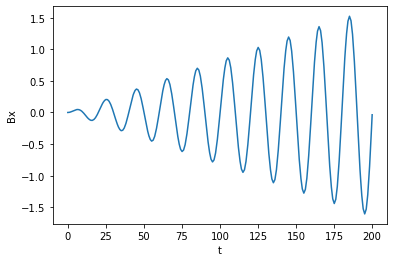

In [ ]:
plt.plot(df['t'], df['Bx'], '-')
plt.xlabel('t')
plt.ylabel('Bx')
plt.show()

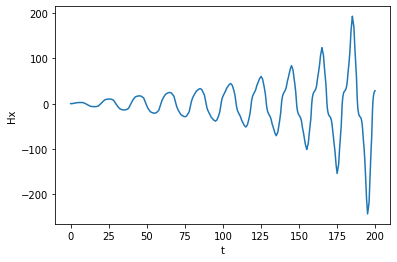

In [ ]:
plt.plot(df['t'], df['Hx'])
plt.xlabel('t')
plt.ylabel('Hx')
plt.show()

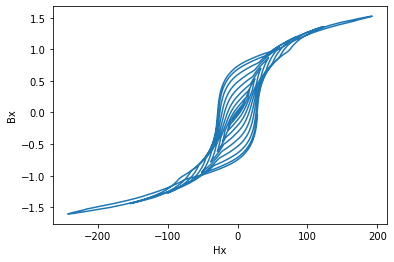

In [ ]:
plt.plot(df['Hx'], df['Bx'])
plt.xlabel('Hx')
plt.ylabel('Bx')
plt.show()

## M6 (20000 data point version)

In [ ]:
df = pd.read_csv('./M6_train20000.csv')
df

t        Hx        Bx            Hy            By  Hz   Bz
0        0.00  0.000000  0.000000  0.000000e+00  0.000000e+00   0  0.0
1        0.01  0.000546  0.000007 -1.460000e-18  2.090000e-18   0  0.0
2        0.02  0.002410  0.000033  1.020000e-15  3.830000e-17   0  0.0
3        0.03  0.004280  0.000058  5.400000e-15  1.540000e-16   0  0.0
4        0.04  0.006140  0.000084  6.350000e-15  7.590000e-17   0  0.0
...       ...       ...       ...           ...           ...  ..  ...
19996  199.96  7.536977 -0.023900 -1.470000e-09 -6.500000e-11   0  0.0
19997  199.97  7.799354 -0.018800 -1.430000e-09 -6.470000e-11   0  0.0
19998  199.98  8.057725 -0.013800 -1.400000e-09 -6.450000e-11   0  0.0
19999  199.99  8.312216 -0.008700 -1.370000e-09 -6.480000e-11   0  0.0
20000  200.00  8.562948 -0.003630 -1.360000e-09 -6.500000e-11   0  0.0

[20001 rows x 7 columns]

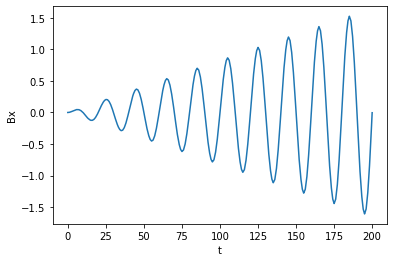

In [ ]:
plt.plot(df['t'], df['Bx'], '-')
plt.xlabel('t')
plt.ylabel('Bx')
plt.show()

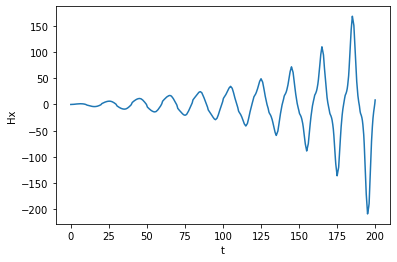

In [ ]:
plt.plot(df['t'], df['Hx'])
plt.xlabel('t')
plt.ylabel('Hx')
plt.show()

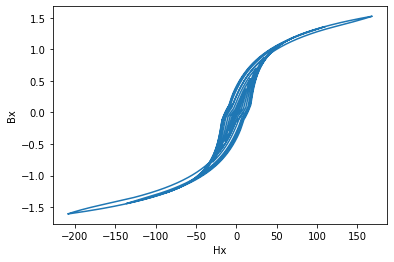

In [ ]:
plt.plot(df['Hx'], df['Bx'])
plt.xlabel('Hx')
plt.ylabel('Bx')
plt.show()

## M19

In [ ]:
df = pd.read_csv('./M19_train.csv')
df

t         Hx        Bx            Hy            By  Hz  \
0       0.0   0.000000  0.000000  0.000000e+00  0.000000e+00   0   
1       0.1   0.016100  0.000075  4.930000e-18 -4.960000e-18   0   
2       0.2   0.070900  0.000329  1.070000e-14  6.050000e-16   0   
3       0.3   0.125582  0.000584 -6.320000e-12 -1.900000e-14   0   
4       0.4   0.180231  0.000838 -7.490000e-13  7.610000e-15   0   
...     ...        ...       ...           ...           ...  ..   
1996  199.6  54.128872 -0.238981 -4.310000e-10 -1.650000e-11   0   
1997  199.7  55.785869 -0.188277 -6.320000e-10 -1.970000e-11   0   
1998  199.8  56.959727 -0.137570 -7.640000e-10 -1.890000e-11   0   
1999  199.9  57.788775 -0.086900 -6.110000e-10 -1.910000e-11   0   
2000  200.0  58.398845 -0.036200 -4.680000e-10 -1.910000e-11   0   

                 Bz  
0     3.234392e-317  
1     3.231985e-315  
2     3.231985e-315  
3     3.231985e-315  
4     3.231985e-315  
...             ...  
1996  3.231985e-315  
1997  3.231985e-315  
1998  3.231985e-315  
1999  3.231985e-315  
2000  3.231985e-315  

[2001 rows x 7 columns]

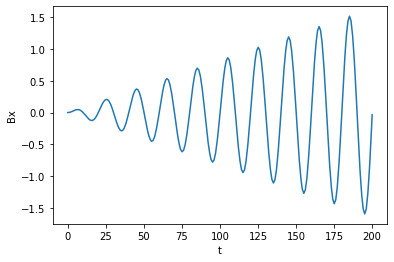

In [ ]:
plt.plot(df['t'], df['Bx'])
plt.xlabel('t')
plt.ylabel('Bx')
plt.show()

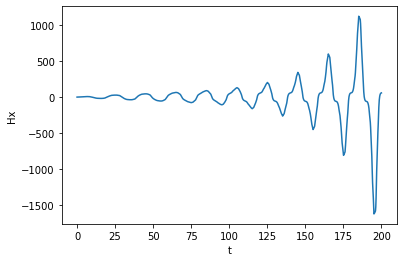

In [ ]:
plt.plot(df['t'], df['Hx'])
plt.xlabel('t')
plt.ylabel('Hx')
plt.show()

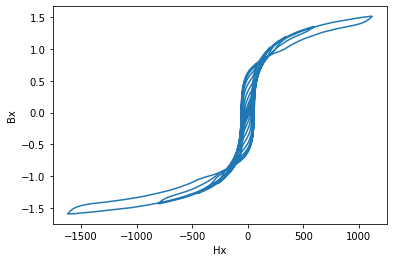

In [ ]:
plt.plot(df['Hx'], df['Bx'])
plt.xlabel('Hx')
plt.ylabel('Bx')
plt.show()

## M27

In [ ]:
df = pd.read_csv('./M27_train.csv')
df

t         Hx        Bx            Hy            By  Hz  \
0       0.0   0.000000  0.000000  0.000000e+00  0.000000e+00   0   
1       0.1   0.029800  0.000074  5.050000e-17 -1.030000e-17   0   
2       0.2   0.131281  0.000329 -1.940000e-14 -1.540000e-15   0   
3       0.3   0.232548  0.000583  2.660000e-12  5.720000e-16   0   
4       0.4   0.333579  0.000837  1.590000e-12 -3.440000e-16   0   
...     ...        ...       ...           ...           ...  ..   
1996  199.6  83.234273 -0.239127  1.010000e-09  1.200000e-11   0   
1997  199.7  84.088881 -0.188419  2.940000e-10  1.080000e-11   0   
1998  199.8  84.683009 -0.137710  4.460000e-10  1.200000e-11   0   
1999  199.9  85.103368 -0.087000  2.890000e-10  1.200000e-11   0   
2000  200.0  85.431758 -0.036300  2.650000e-10  1.230000e-11   0   

                 Bz  
0      0.000000e+00  
1     3.173707e-315  
2     3.173707e-315  
3     3.173707e-315  
4     3.173707e-315  
...             ...  
1996  3.173707e-315  
1997  3.173707e-315  
1998  3.173707e-315  
1999  3.173707e-315  
2000  3.173707e-315  

[2001 rows x 7 columns]

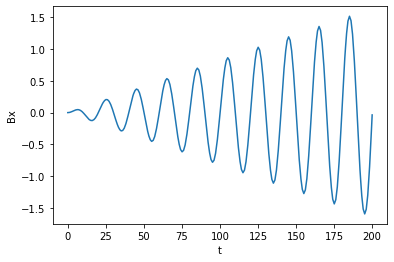

In [ ]:
plt.plot(df['t'], df['Bx'], '-')
plt.xlabel('t')
plt.ylabel('Bx')
plt.show()

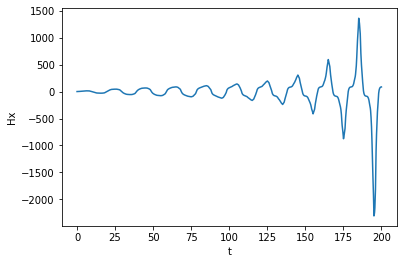

In [ ]:
plt.plot(df['t'], df['Hx'])
plt.xlabel('t')
plt.ylabel('Hx')
plt.show()

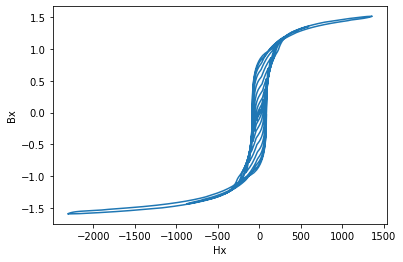

In [ ]:
plt.plot(df['Hx'], df['Bx'])
plt.xlabel('Hx')
plt.ylabel('Bx')
plt.show()

## 20PNF1500

In [ ]:
df = pd.read_csv('./20PNF1500_train.csv')
df

t         Hx        Bx            Hy            By  Hz  \
0       0.0   0.000000  0.000000  0.000000e+00  0.000000e+00   0   
1       0.1   0.008970  0.000075  2.070000e-18  2.190000e-17   0   
2       0.2   0.039600  0.000329 -2.010000e-14 -8.070000e-16   0   
3       0.3   0.070200  0.000584 -1.240000e-12  1.240000e-14   0   
4       0.4   0.100677  0.000839  2.140000e-12  3.780000e-14   0   
...     ...        ...       ...           ...           ...  ..   
1996  199.6  24.903787 -0.238834 -7.050000e-10 -1.320000e-11   0   
1997  199.7  26.197892 -0.188128 -7.090000e-10 -1.350000e-11   0   
1998  199.8  27.139616 -0.137420 -6.050000e-10 -9.640000e-12   0   
1999  199.9  27.827180 -0.086700 -1.980000e-10 -8.510000e-12   0   
2000  200.0  28.348415 -0.036000 -2.660000e-10 -1.240000e-11   0   

                 Bz  
0      0.000000e+00  
1     3.332685e-315  
2     3.332685e-315  
3     3.332685e-315  
4     3.332685e-315  
...             ...  
1996  3.332685e-315  
1997  3.332685e-315  
1998  3.332685e-315  
1999  3.332685e-315  
2000  3.332685e-315  

[2001 rows x 7 columns]

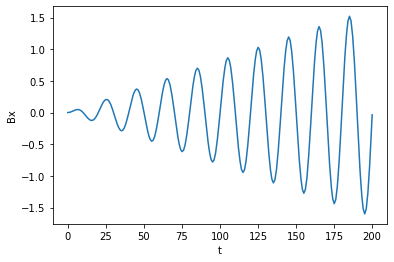

In [ ]:
plt.plot(df['t'], df['Bx'], '-')
plt.xlabel('t')
plt.ylabel('Bx')
plt.show()

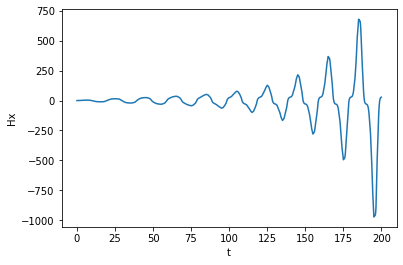

In [ ]:
plt.plot(df['t'], df['Hx'])
plt.xlabel('t')
plt.ylabel('Hx')
plt.show()

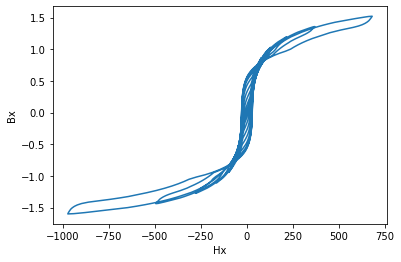

In [ ]:
plt.plot(df['Hx'], df['Bx'])
plt.xlabel('Hx')
plt.ylabel('Bx')
plt.show()

# Training and Testing Sets

In [ ]:
def generate_timesteps(df, window=1):
  assert window > 0

  y = np.zeros((len(df), window, 1))
  x = np.zeros((len(df), window, 2))

  for w in range(window):
    y[w:, window - w - 1, 0] = df['Bx'][:len(df) - w]

  for w in range(window):
    x[w:, window - w - 1, 0] = df['Hx'][:len(df) - w]

  for w in range(window):
    x[w + 1:, window - w - 1, 1] = df['Bx'][:len(df) - w - 1]

  return (x, y[:, -1, :])

## M6 (2000 data point version)

In [ ]:
(M6_train_X, M6_train_Y) = generate_timesteps(pd.read_csv('./M6_train.csv'), window=30)
(M6_test_X, M6_test_Y)   = generate_timesteps(pd.read_csv('./M6_test.csv'), window=30)

print("Training Set")
print(f"  X: {M6_train_X.shape}")
print(f"  Y: {M6_train_Y.shape}")

print("Testing Set")
print(f"  X: {M6_test_X.shape}")
print(f"  Y: {M6_test_Y.shape}")

Training Set
  X: (2001, 30, 2)
  Y: (2001, 1)
Testing Set
  X: (11766, 30, 2)
  Y: (11766, 1)


## M6 (20000 data point version)

In [ ]:
(M6_20000_train_X, M6_20000_train_Y) = generate_timesteps(pd.read_csv('./M6_train20000.csv'), window=30)

print("Training Set")
print(f"  X: {M6_20000_train_X.shape}")
print(f"  Y: {M6_20000_train_Y.shape}")

Training Set
  X: (20001, 30, 2)
  Y: (20001, 1)


## M19

In [ ]:
(M19_train_X, M19_train_Y) = generate_timesteps(pd.read_csv('./M19_train.csv'), window=30)
(M19_test_X, M19_test_Y)   = generate_timesteps(pd.read_csv('./M19_test.csv'), window=30)

print("Training Set")
print(f"  X: {M19_train_X.shape}")
print(f"  Y: {M19_train_Y.shape}")

print("Testing Set")
print(f"  X: {M19_test_X.shape}")
print(f"  Y: {M19_test_Y.shape}")

Training Set
  X: (2001, 30, 2)
  Y: (2001, 1)
Testing Set
  X: (1178, 30, 2)
  Y: (1178, 1)


## M27

In [ ]:
(M27_train_X, M27_train_Y) = generate_timesteps(pd.read_csv('./M27_train.csv'), window=30)
(M27_test_X, M27_test_Y)   = generate_timesteps(pd.read_csv('./M27_test.csv'), window=30)

print("Training Set")
print(f"  X: {M27_train_X.shape}")
print(f"  Y: {M27_train_Y.shape}")

print("Testing Set")
print(f"  X: {M27_test_X.shape}")
print(f"  Y: {M27_test_Y.shape}")

Training Set
  X: (2001, 30, 2)
  Y: (2001, 1)
Testing Set
  X: (1178, 30, 2)
  Y: (1178, 1)


## 20PNF1500

In [ ]:
(_20PNF1500_train_X, _20PNF1500_train_Y) = generate_timesteps(pd.read_csv('./20PNF1500_train.csv'), window=30)
(_20PNF1500_test_X, _20PNF1500_test_Y)   = generate_timesteps(pd.read_csv('./20PNF1500_test.csv'), window=30)

print("Training Set")
print(f"  X: {_20PNF1500_train_X.shape}")
print(f"  Y: {_20PNF1500_train_Y.shape}")

print("Testing Set")
print(f"  X: {_20PNF1500_test_X.shape}")
print(f"  Y: {_20PNF1500_test_Y.shape}")

Training Set
  X: (2001, 30, 2)
  Y: (2001, 1)
Testing Set
  X: (11766, 30, 2)
  Y: (11766, 1)


# ML Models

## Temporal Convolution Network (CNV4)

In [ ]:
def new_model_cnv4():
  input = tf.keras.layers.Input(shape=(7, 2))

  x = input
  for i in range(4):
    x = tf.keras.layers.Conv1D(128, kernel_size=(4,), padding='causal', activation='swish')(x)
    y = tf.keras.layers.Conv1D(128, kernel_size=(4,), padding='causal', activation='swish')(x)
    x = tf.keras.layers.Add()([x, y])

  x = tf.keras.layers.Conv1D(128, kernel_size=(3,), activation='swish')(x)
  x = tf.keras.layers.Dense(128, activation='swish')(x)

  x = tf.keras.layers.Conv1D(128, kernel_size=(3,), activation='swish')(x)
  x = tf.keras.layers.Dense(128, activation='swish')(x)

  x = tf.keras.layers.Conv1D(128, kernel_size=(3,), activation='swish')(x)
  x = tf.keras.layers.Dense(128, activation='swish')(x)

  x = tf.keras.layers.Dense(1, activation='linear')(x)
  x = tf.keras.layers.Flatten()(x)

  model = tf.keras.Model(inputs=input, outputs=x)
  return model

new_model_cnv4().summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 2)]       0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 7, 128)       1152        ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 7, 128)       65664       ['conv1d[0][0]']                 
                                                                                                  
 add (Add)                      (None, 7, 128)       0           ['conv1d[0][0]',                 
                                                                  'conv1d_1[0][0]']           

## LSTM

In [ ]:
def new_model_lstm():
  return tf.keras.Sequential([
    tf.keras.layers.LSTM(400, input_shape=(None, 2), return_sequences=True),
    tf.keras.layers.LSTM(400),
    tf.keras.layers.Dense(1),
  ])

new_model_lstm().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 400)         644800    
                                                                 
 lstm_1 (LSTM)               (None, 400)               1281600   
                                                                 
 dense_4 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,926,801
Trainable params: 1,926,801
Non-trainable params: 0
_________________________________________________________________


## GRU1

In [ ]:
def new_model_gru1():
  input = tf.keras.Input(shape=(None, 2))

  x = tf.keras.layers.GRU(32, return_sequences=True)(input)
  x = tf.keras.layers.GRU(1)(x)
  x = 2 * x

  model = tf.keras.Model(input, x)
  return model

new_model_gru1().summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, 2)]         0         
                                                                 
 gru (GRU)                   (None, None, 32)          3456      
                                                                 
 gru_1 (GRU)                 (None, 1)                 105       
                                                                 
 tf.math.multiply (TFOpLambd  (None, 1)                0         
 a)                                                              
                                                                 
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


# Model Utilities

In [ ]:
def compile_and_fit(model, train_X, train_Y,
                    epochs=1000,
                    patience=10,
                    min_delta=0,
                    batch_size=50,
                    seed=9763):
  if seed is not None:
    np.random.seed(seed)
    tf.random.set_seed(seed)

  model.compile(loss='mse', optimizer='adam')
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                    mode='auto',
                                                    verbose=0,
                                                    min_delta=min_delta,
                                                    patience=patience)
  return model.fit(train_X, train_Y,
                   epochs=epochs,
                   batch_size=batch_size,
                   callbacks=[early_stopping])

In [ ]:
def plot_train_stats(history):
  plt.plot(history.history['loss'])
  plt.title('Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.show()

In [ ]:
def plot_predictions(pred, actual, **kwargs):
  (fig, ax) = plt.subplots(2, sharex=True, **kwargs)

  ax[0].plot(actual, label='expected')
  ax[0].plot(pred, label='prediction')
  ax[0].set_ylabel('Bx')
  ax[0].legend()

  ax[1].plot(np.abs(actual - pred))
  ax[1].set_ylabel('delta')
  ax[1].grid()

  plt.xlabel('t')
  plt.show()

  print(f"MSE: {np.square(actual - pred).mean()}")

In [ ]:
def inference_loop(model, data_X):
  data_X = np.array(data_X, copy=True)

  y = np.empty(len(data_X))
  print(f"Start inference loop on {len(data_X)} samples...", end="")
  start = time()
  for i in range(len(data_X) - 1):
    y[i] = model.predict(data_X[i, None]).flatten()[-1]

    data_X[i + 1, :-1, 1] = data_X[i, 1:, 1]
    data_X[i + 1, -1, 1] = y[i]

  i = len(data_X) - 1
  y[i] = model.predict(data_X[i, None]).flatten()[-1]
  end = time()
  print(f" DONE after {end - start}s")
  return y.reshape((-1, 1))

# Model Performance

## CNV4

Note that CNV4 uses 7 timesteps while the data has 30. Need to only keep the last 7.

### M6 (2000 data point version)

Epoch 1/1000
41/41 [==============================] - 6s 95ms/step - loss: 0.0725
Epoch 2/1000
41/41 [==============================] - 3s 75ms/step - loss: 0.0176
Epoch 3/1000
41/41 [==============================] - 3s 72ms/step - loss: 0.0126
Epoch 4/1000
41/41 [==============================] - 3s 67ms/step - loss: 0.0202
Epoch 5/1000
41/41 [==============================] - 2s 45ms/step - loss: 0.0090
Epoch 6/1000
41/41 [==============================] - 3s 61ms/step - loss: 0.0094
Epoch 7/1000
41/41 [==============================] - 3s 71ms/step - loss: 0.0049
Epoch 8/1000
41/41 [==============================] - 3s 61ms/step - loss: 0.0031
Epoch 9/1000
41/41 [==============================] - 3s 63ms/step - loss: 0.0022
Epoch 10/1000
41/41 [==============================] - 2s 61ms/step - loss: 0.0018
Epoch 11/1000
41/41 [==============================] - 3s 72ms/step - loss: 0.0052
Epoch 12/1000
41/41 [==============================] - 3s 67ms/step - loss: 0.0020
Epoch 13/1000

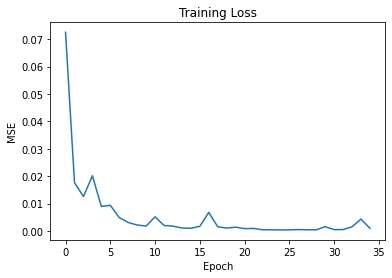

In [ ]:
model = new_model_cnv4()
history = compile_and_fit(model, M6_train_X[:, -7:, :], M6_train_Y)
model.save('./Model_CNV4_M6')
plot_train_stats(history)
del model, history

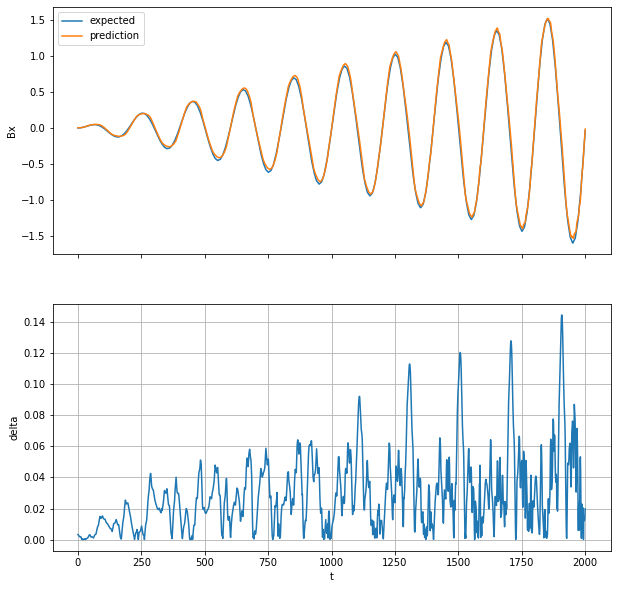

MSE: 0.0014697343470324795


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M6')
pred = model.predict(M6_train_X[:, -7:, :])
del model

plot_predictions(pred, M6_train_Y, figsize=(10, 10))

Start inference loop on 2001 samples... DONE after 164.8510570526123s


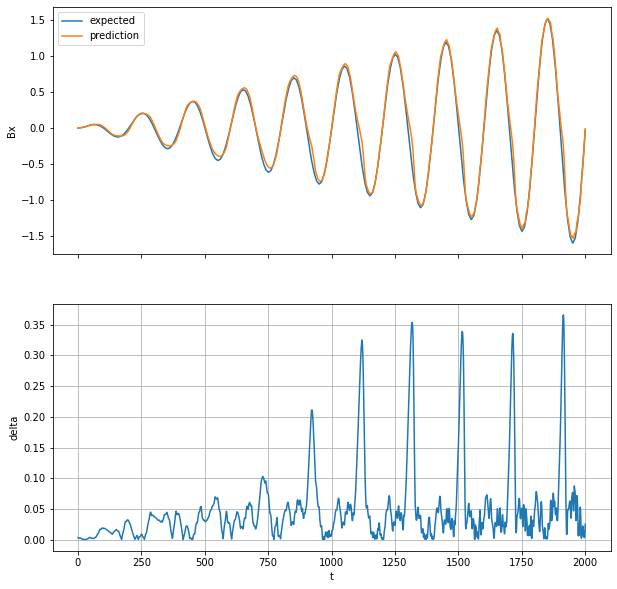

MSE: 0.006535615935928543


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M6')
pred = inference_loop(model, M6_train_X[:, -7:, :])
del model

plot_predictions(pred, M6_train_Y, figsize=(10, 10))

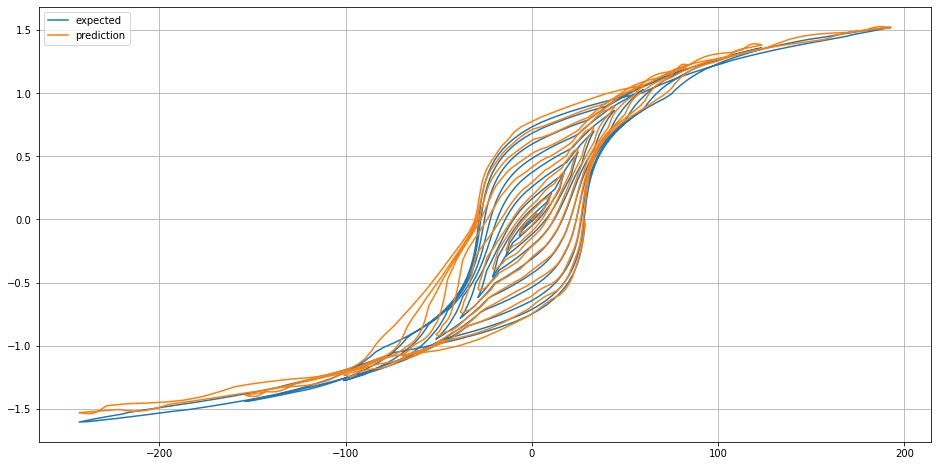

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_train_X[:, -1, 0], M6_train_Y, label='expected')
plt.plot(M6_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

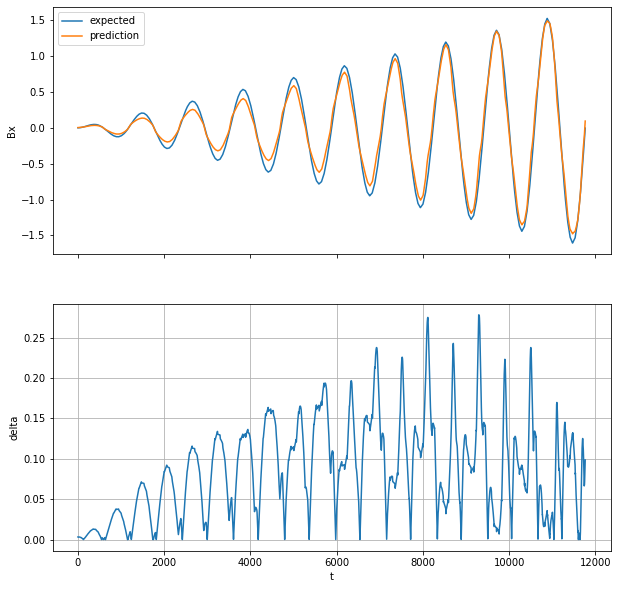

MSE: 0.010733504892761139


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M6')
pred = model.predict(M6_test_X[:, -7:, :])
del model

plot_predictions(pred, M6_test_Y, figsize=(10, 10))

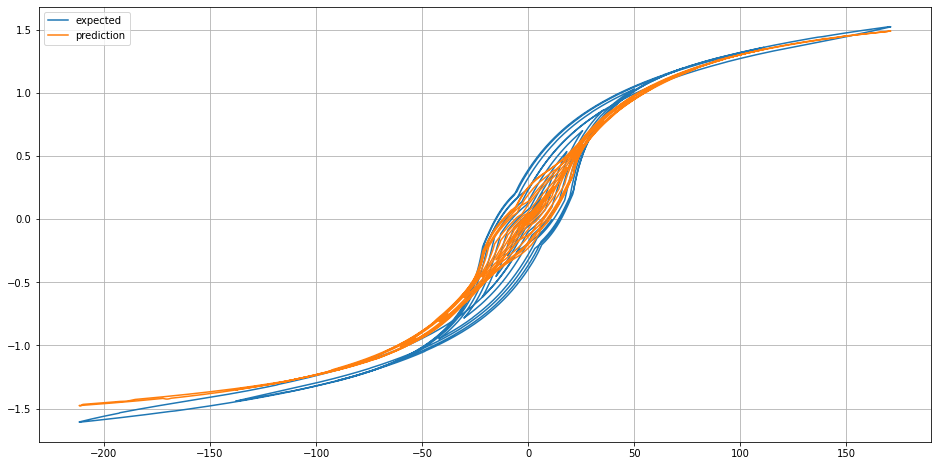

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_test_X[:, -1, 0], M6_test_Y, label='expected')
plt.plot(M6_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 776.2089953422546s


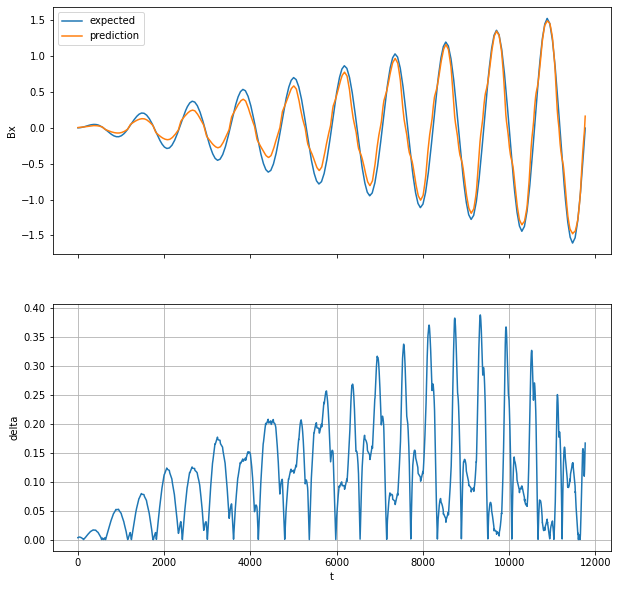

MSE: 0.0197570484791807


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M6')
pred = inference_loop(model, M6_test_X[:, -7:, :])
del model

plot_predictions(pred, M6_test_Y, figsize=(10, 10))

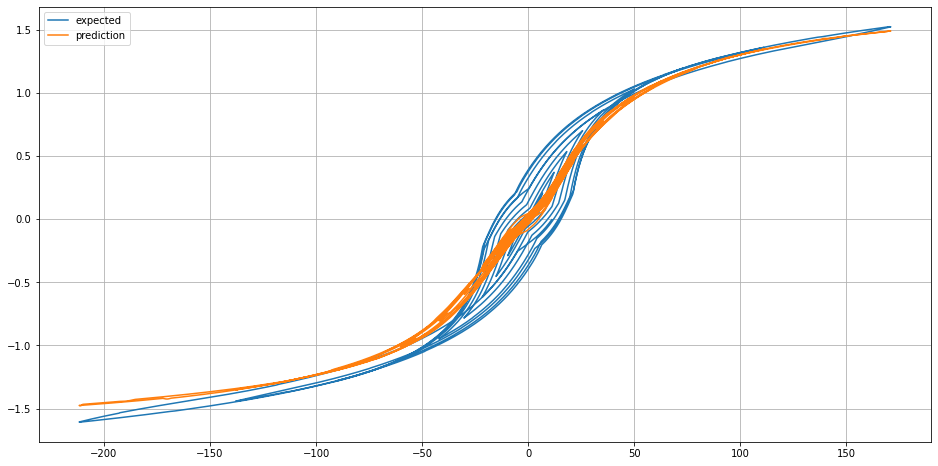

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_test_X[:, -1, 0], M6_test_Y, label='expected')
plt.plot(M6_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M19

Epoch 1/1000
41/41 [==============================] - 4s 44ms/step - loss: 0.8520
Epoch 2/1000
41/41 [==============================] - 2s 46ms/step - loss: 0.0354
Epoch 3/1000
41/41 [==============================] - 2s 59ms/step - loss: 0.0187
Epoch 4/1000
41/41 [==============================] - 3s 75ms/step - loss: 0.0181
Epoch 5/1000
41/41 [==============================] - 3s 72ms/step - loss: 0.0111
Epoch 6/1000
41/41 [==============================] - 3s 69ms/step - loss: 0.0084
Epoch 7/1000
41/41 [==============================] - 3s 78ms/step - loss: 0.0063
Epoch 8/1000
41/41 [==============================] - 3s 64ms/step - loss: 0.0058
Epoch 9/1000
41/41 [==============================] - 3s 71ms/step - loss: 0.0219
Epoch 10/1000
41/41 [==============================] - 3s 67ms/step - loss: 0.0055
Epoch 11/1000
41/41 [==============================] - 3s 71ms/step - loss: 0.0062
Epoch 12/1000
41/41 [==============================] - 3s 67ms/step - loss: 0.0052
Epoch 13/1000

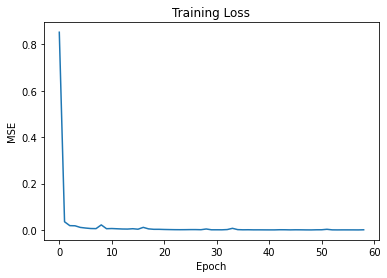

In [ ]:
model = new_model_cnv4()
history = compile_and_fit(model, M19_train_X[:, -7:, :], M19_train_Y)
model.save('./Model_CNV4_M19')
plot_train_stats(history)
del model, history

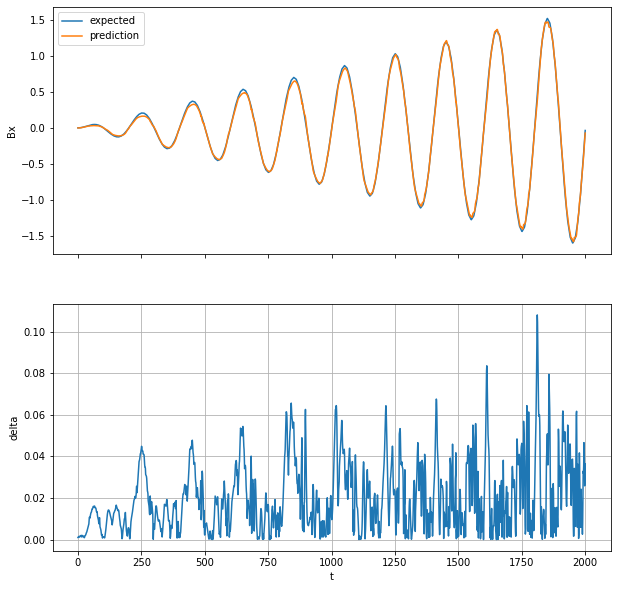

MSE: 0.000692295560293641


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M19')
pred = model.predict(M19_train_X[:, -7:, :])
del model

plot_predictions(pred, M19_train_Y, figsize=(10, 10))

Start inference loop on 2001 samples... DONE after 112.089120388031s


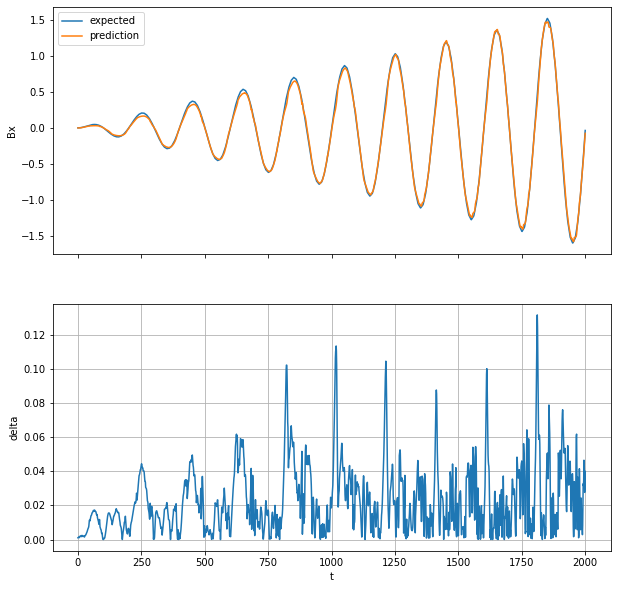

MSE: 0.000913712340425216


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M19')
pred = inference_loop(model, M19_train_X[:, -7:, :])
del model

plot_predictions(pred, M19_train_Y, figsize=(10, 10))

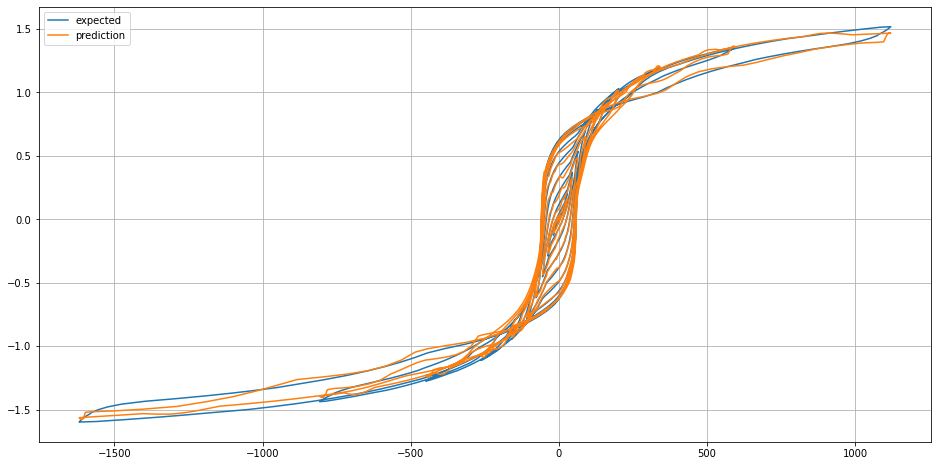

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_train_X[:, -1, 0], M19_train_Y, label='expected')
plt.plot(M19_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

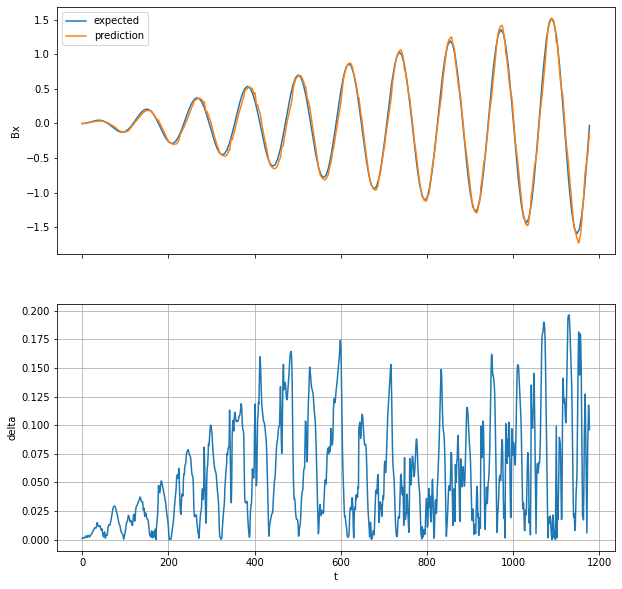

MSE: 0.005261822866404998


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M19')
pred = model.predict(M19_test_X[:, -7:, :])
del model

plot_predictions(pred, M19_test_Y, figsize=(10, 10))

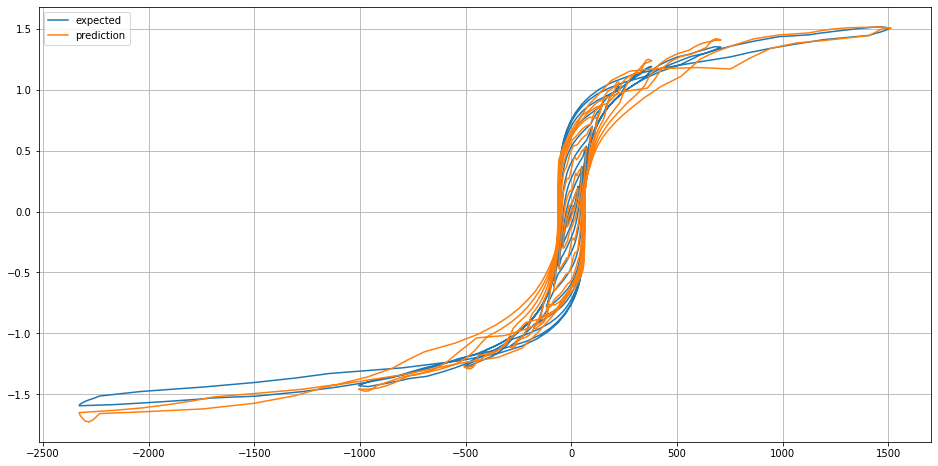

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_test_X[:, -1, 0], M19_test_Y, label='expected')
plt.plot(M19_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 59.35701131820679s


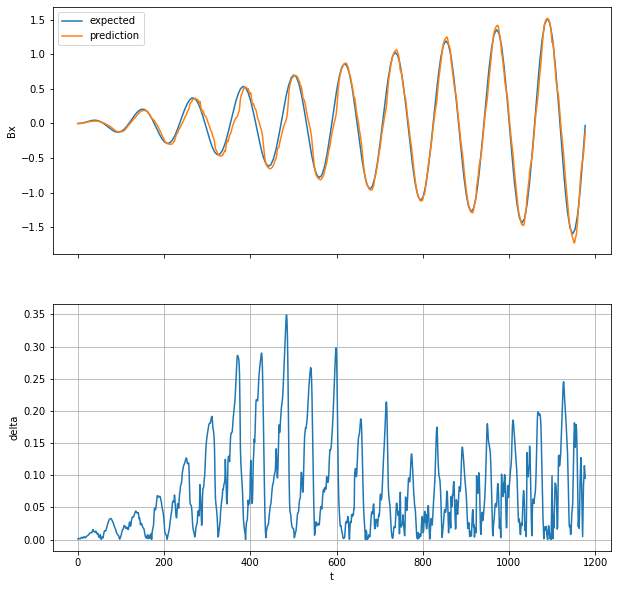

MSE: 0.010491089267207616


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M19')
pred = inference_loop(model, M19_test_X[:, -7:, :])
del model

plot_predictions(pred, M19_test_Y, figsize=(10, 10))

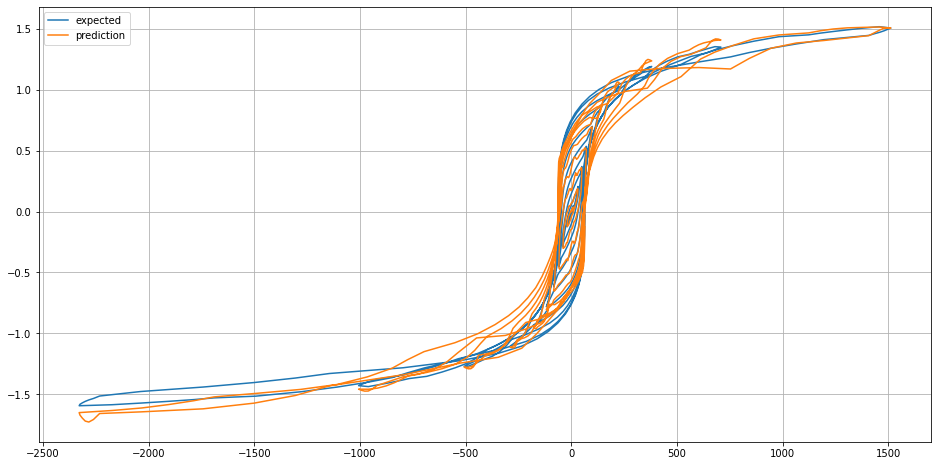

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_test_X[:, -1, 0], M19_test_Y, label='expected')
plt.plot(M19_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M27

Epoch 1/1000
41/41 [==============================] - 5s 44ms/step - loss: 1.0894
Epoch 2/1000
41/41 [==============================] - 2s 44ms/step - loss: 0.0510
Epoch 3/1000
41/41 [==============================] - 2s 44ms/step - loss: 0.0313
Epoch 4/1000
41/41 [==============================] - 2s 45ms/step - loss: 0.0288
Epoch 5/1000
41/41 [==============================] - 2s 43ms/step - loss: 0.0161
Epoch 6/1000
41/41 [==============================] - 2s 44ms/step - loss: 0.0159
Epoch 7/1000
41/41 [==============================] - 2s 43ms/step - loss: 0.0124
Epoch 8/1000
41/41 [==============================] - 2s 44ms/step - loss: 0.0101
Epoch 9/1000
41/41 [==============================] - 2s 44ms/step - loss: 0.0060
Epoch 10/1000
41/41 [==============================] - 2s 44ms/step - loss: 0.0072
Epoch 11/1000
41/41 [==============================] - 2s 44ms/step - loss: 0.0084
Epoch 12/1000
41/41 [==============================] - 2s 44ms/step - loss: 0.0061
Epoch 13/1000

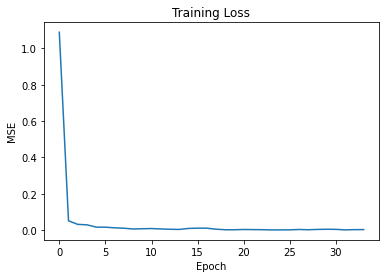

In [ ]:
model = new_model_cnv4()
history = compile_and_fit(model, M27_train_X[:, -7:, :], M27_train_Y)
model.save('./Model_CNV4_M27')
plot_train_stats(history)
del model, history

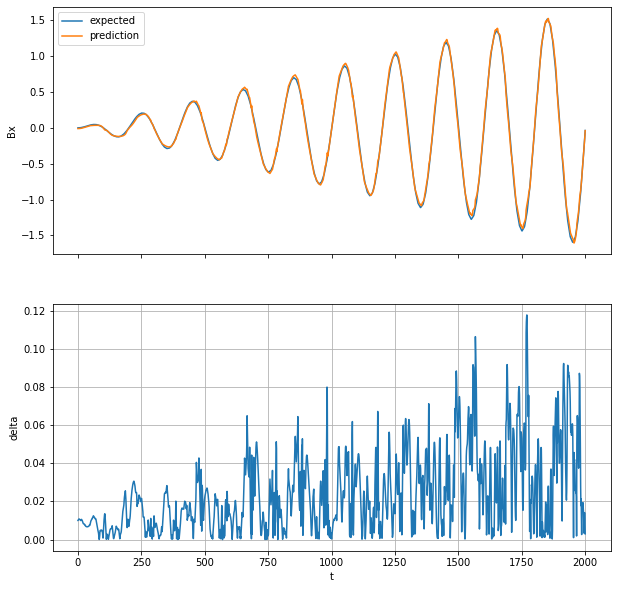

MSE: 0.0010086860412088661


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M27')
pred = model.predict(M27_train_X[:, -7:, :])
del model

plot_predictions(pred, M27_train_Y, figsize=(10, 10))

Start inference loop on 2001 samples... DONE after 103.92175364494324s


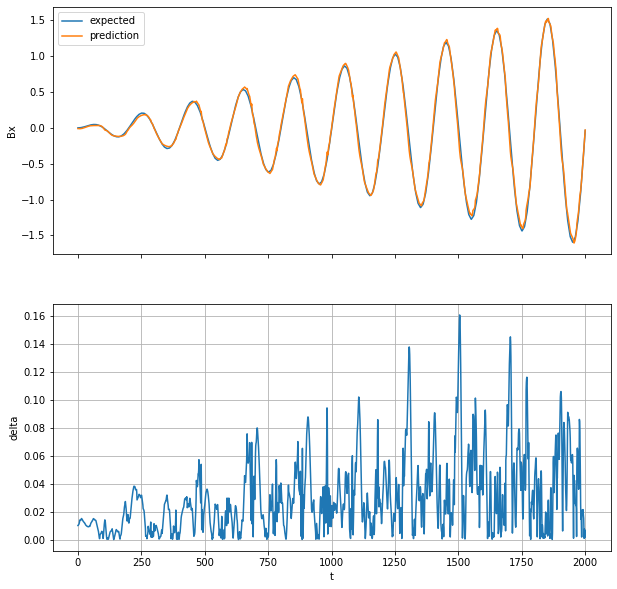

MSE: 0.0016540537374140753


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M27')
pred = inference_loop(model, M27_train_X[:, -7:, :])
del model

plot_predictions(pred, M27_train_Y, figsize=(10, 10))

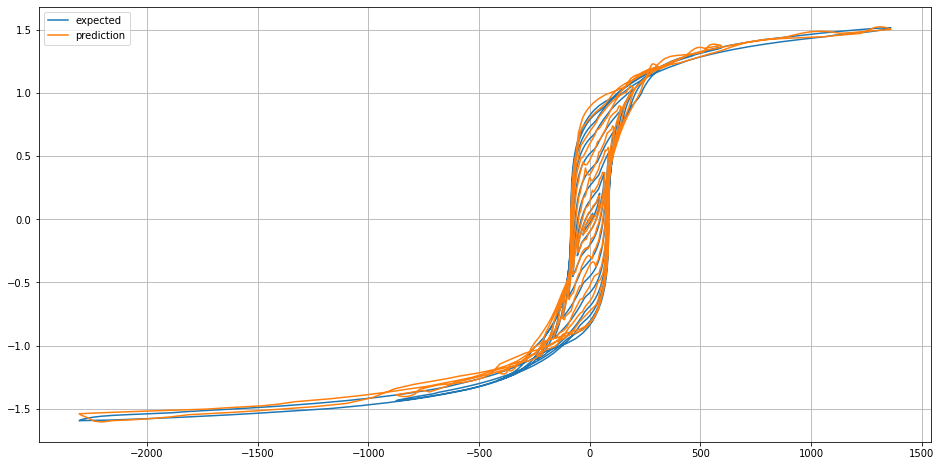

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_train_X[:, -1, 0], M27_train_Y, label='expected')
plt.plot(M27_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

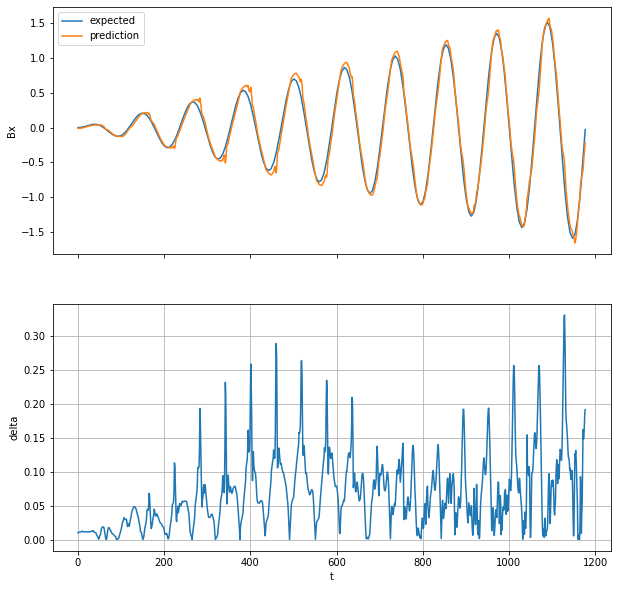

MSE: 0.007316160481136953


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M27')
pred = model.predict(M27_test_X[:, -7:, :])
del model

plot_predictions(pred, M27_test_Y, figsize=(10, 10))

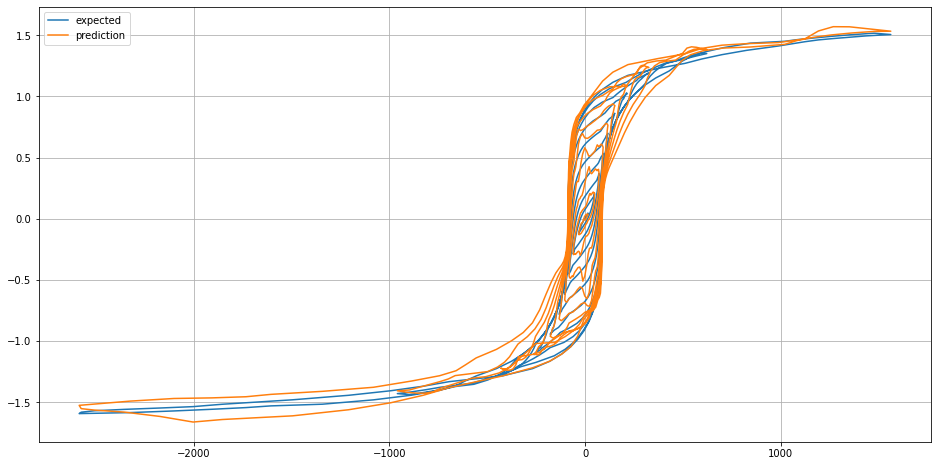

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_test_X[:, -1, 0], M27_test_Y, label='expected')
plt.plot(M27_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 58.721941232681274s


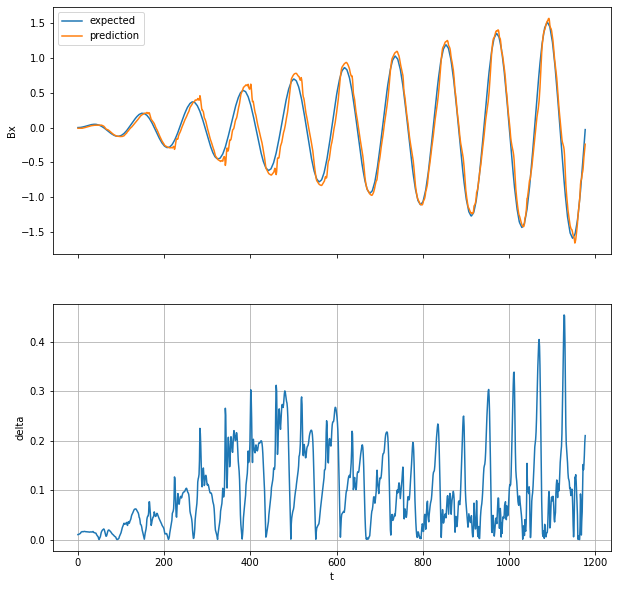

MSE: 0.016214716937008346


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M27')
pred = inference_loop(model, M27_test_X[:, -7:, :])
del model

plot_predictions(pred, M27_test_Y, figsize=(10, 10))

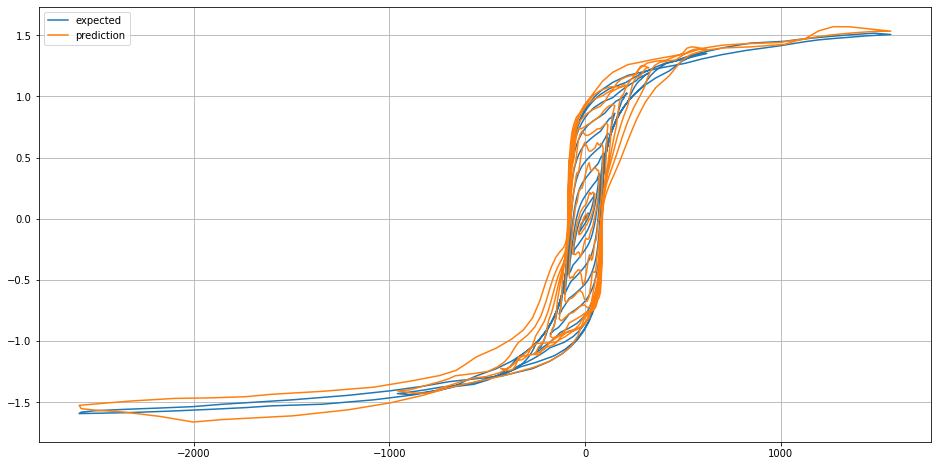

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_test_X[:, -1, 0], M27_test_Y, label='expected')
plt.plot(M27_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### 20PNF1500

Epoch 1/1000
41/41 [==============================] - 5s 44ms/step - loss: 0.6966
Epoch 2/1000
41/41 [==============================] - 2s 44ms/step - loss: 0.0300
Epoch 3/1000
41/41 [==============================] - 2s 43ms/step - loss: 0.0134
Epoch 4/1000
41/41 [==============================] - 2s 43ms/step - loss: 0.0114
Epoch 5/1000
41/41 [==============================] - 2s 44ms/step - loss: 0.0061
Epoch 6/1000
41/41 [==============================] - 2s 44ms/step - loss: 0.0046
Epoch 7/1000
41/41 [==============================] - 2s 43ms/step - loss: 0.0044
Epoch 8/1000
41/41 [==============================] - 2s 43ms/step - loss: 0.0029
Epoch 9/1000
41/41 [==============================] - 2s 44ms/step - loss: 0.0036
Epoch 10/1000
41/41 [==============================] - 2s 43ms/step - loss: 0.0026
Epoch 11/1000
41/41 [==============================] - 2s 44ms/step - loss: 0.0024
Epoch 12/1000
41/41 [==============================] - 2s 43ms/step - loss: 0.0019
Epoch 13/1000

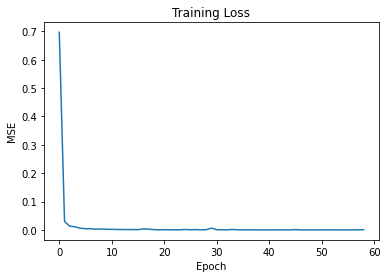

In [ ]:
model = new_model_cnv4()
history = compile_and_fit(model, _20PNF1500_train_X[:, -7:, :], _20PNF1500_train_Y)
model.save('./Model_CNV4__20PNF1500')
plot_train_stats(history)
del model, history

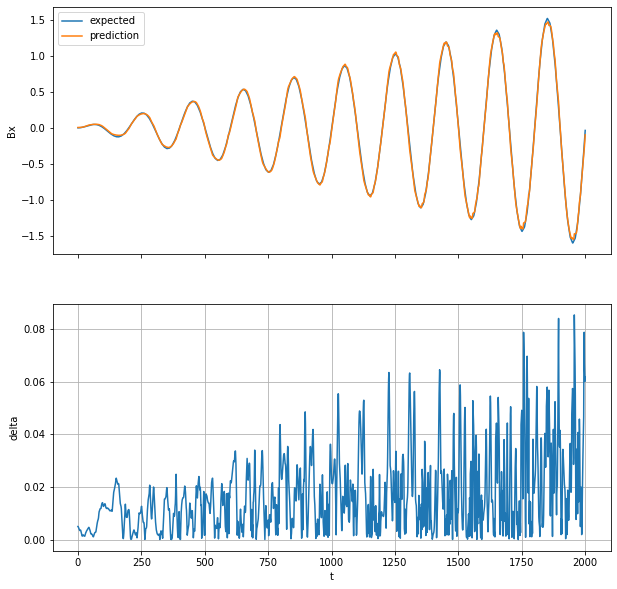

MSE: 0.00048594464442864373


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4__20PNF1500')
pred = model.predict(_20PNF1500_train_X[:, -7:, :])
del model

plot_predictions(pred, _20PNF1500_train_Y, figsize=(10, 10))

Start inference loop on 2001 samples... DONE after 101.76378345489502s


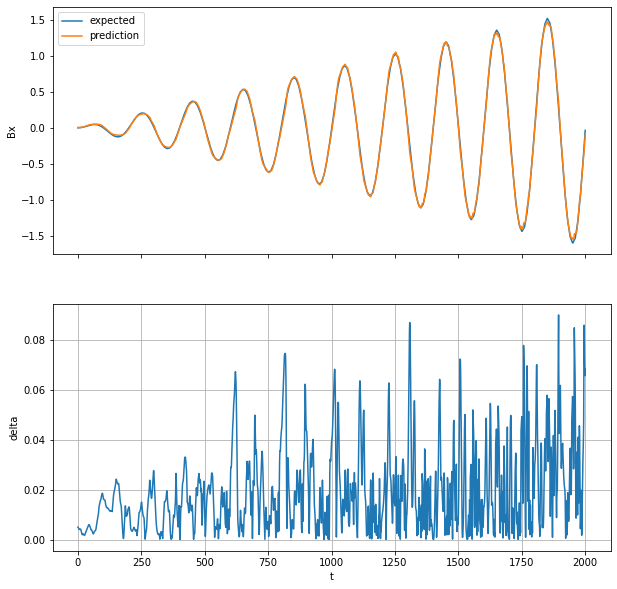

MSE: 0.0006366958214042461


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4__20PNF1500')
pred = inference_loop(model, _20PNF1500_train_X[:, -7:, :])
del model

plot_predictions(pred, _20PNF1500_train_Y, figsize=(10, 10))

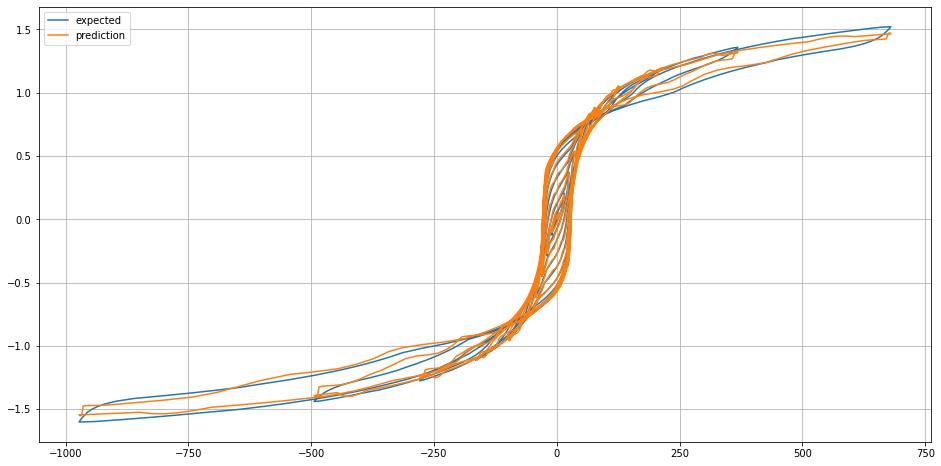

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_train_X[:, -1, 0], _20PNF1500_train_Y, label='expected')
plt.plot(_20PNF1500_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

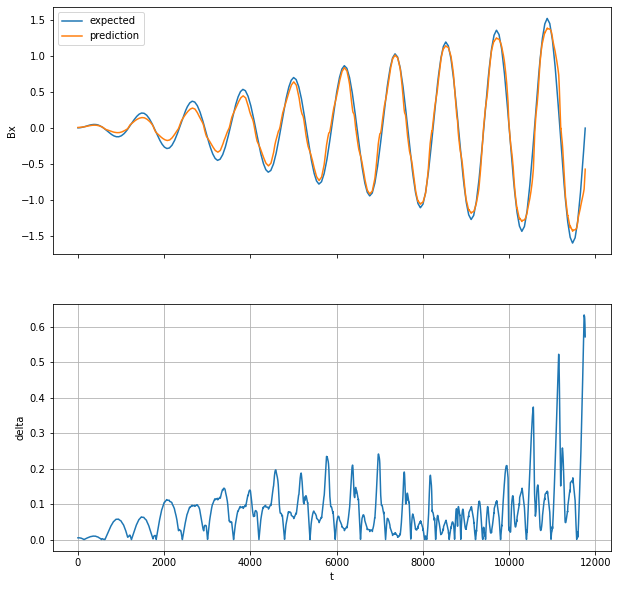

MSE: 0.011763854838812574


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4__20PNF1500')
pred = model.predict(_20PNF1500_test_X[:, -7:, :])
del model

plot_predictions(pred, _20PNF1500_test_Y, figsize=(10, 10))

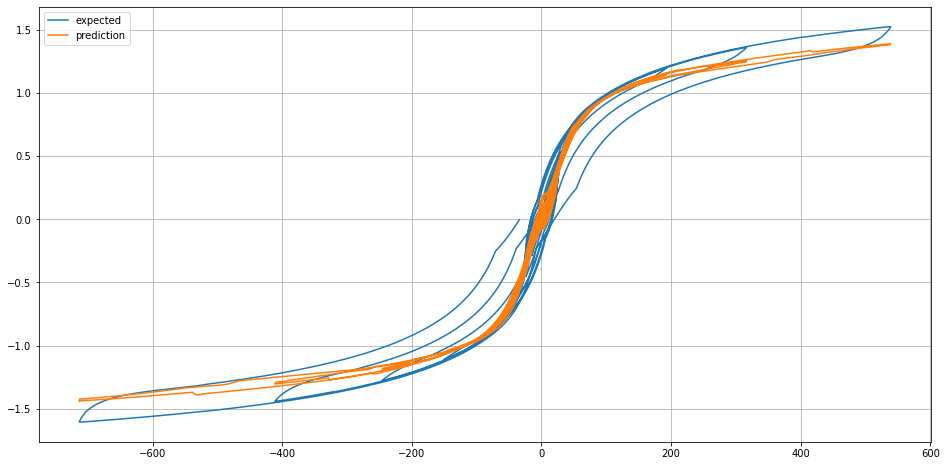

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_test_X[:, -1, 0], _20PNF1500_test_Y, label='expected')
plt.plot(_20PNF1500_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 600.8914189338684s


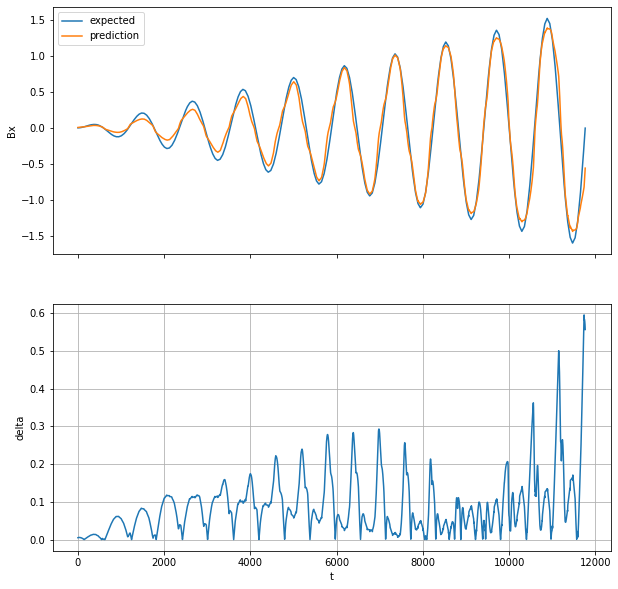

MSE: 0.013899155184355071


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4__20PNF1500')
pred = inference_loop(model, _20PNF1500_test_X[:, -7:, :])
del model

plot_predictions(pred, _20PNF1500_test_Y, figsize=(10, 10))

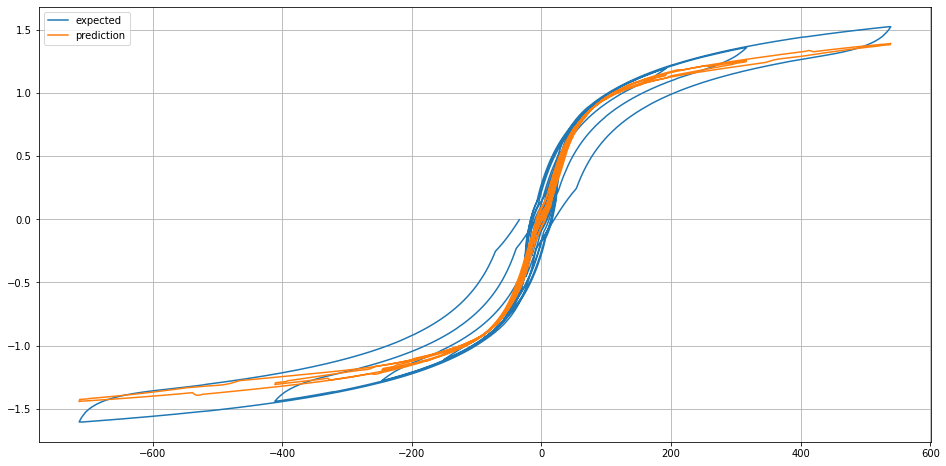

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_test_X[:, -1, 0], _20PNF1500_test_Y, label='expected')
plt.plot(_20PNF1500_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

## LSTM

### M6 (2000 data point version)

Epoch 1/1000
41/41 [==============================] - 31s 623ms/step - loss: 0.5894
Epoch 2/1000
41/41 [==============================] - 25s 617ms/step - loss: 0.0090
Epoch 3/1000
41/41 [==============================] - 26s 623ms/step - loss: 0.0020
Epoch 4/1000
41/41 [==============================] - 25s 618ms/step - loss: 0.0013
Epoch 5/1000
41/41 [==============================] - 26s 625ms/step - loss: 0.0011
Epoch 6/1000
41/41 [==============================] - 26s 623ms/step - loss: 0.0014
Epoch 7/1000
41/41 [==============================] - 26s 625ms/step - loss: 5.0792e-04
Epoch 8/1000
41/41 [==============================] - 26s 630ms/step - loss: 4.3586e-04
Epoch 9/1000
41/41 [==============================] - 26s 629ms/step - loss: 3.6106e-04
Epoch 10/1000
41/41 [==============================] - 26s 623ms/step - loss: 3.3465e-04
Epoch 11/1000
41/41 [==============================] - 25s 615ms/step - loss: 3.4681e-04
Epoch 12/1000
41/41 [==============================] -

INFO:tensorflow:Assets written to: ./Model_LSTM_M6/assets


INFO:tensorflow:Assets written to: ./Model_LSTM_M6/assets


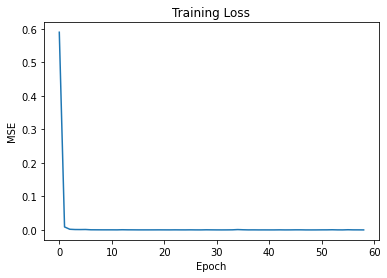

In [ ]:
model = new_model_lstm()
history = compile_and_fit(model, M6_train_X, M6_train_Y)
model.save('./Model_LSTM_M6')
plot_train_stats(history)
del model, history

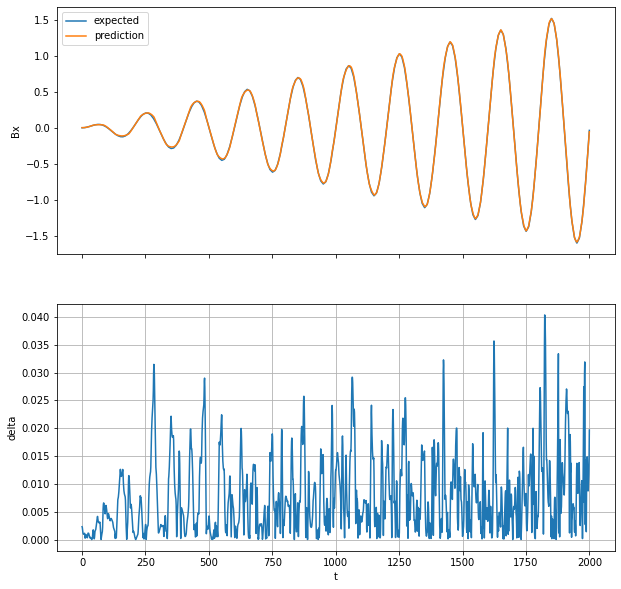

MSE: 0.00010771409775741924


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M6')
pred = model.predict(M6_train_X)
del model

plot_predictions(pred, M6_train_Y, figsize=(10, 10))

Start inference loop on 2001 samples... DONE after 135.52180075645447s


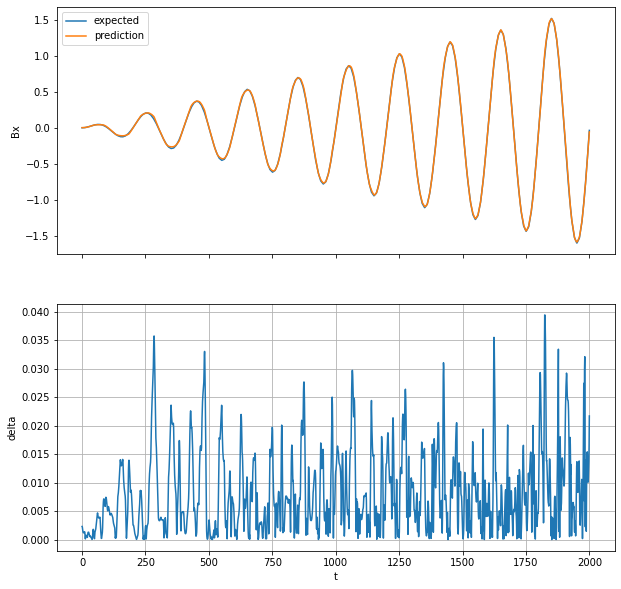

MSE: 0.00012038704021634985


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M6')
pred = inference_loop(model, M6_train_X)
del model

plot_predictions(pred, M6_train_Y, figsize=(10, 10))

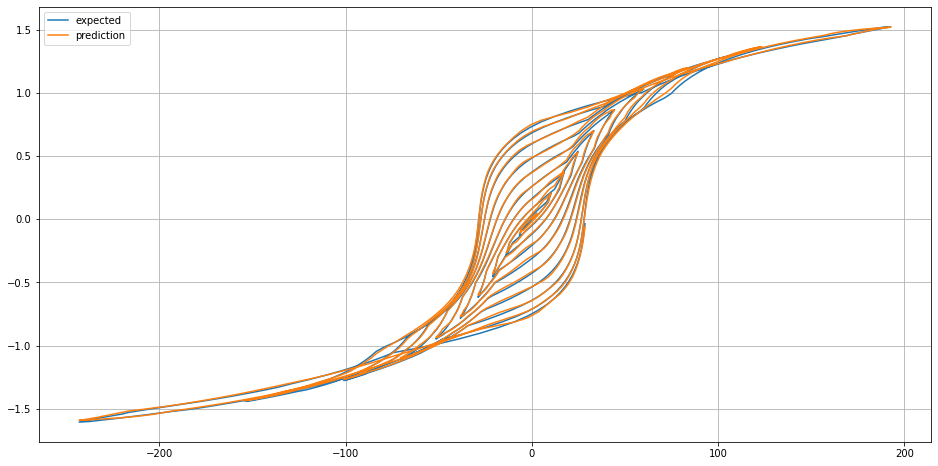

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_train_X[:, -1, 0], M6_train_Y, label='expected')
plt.plot(M6_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

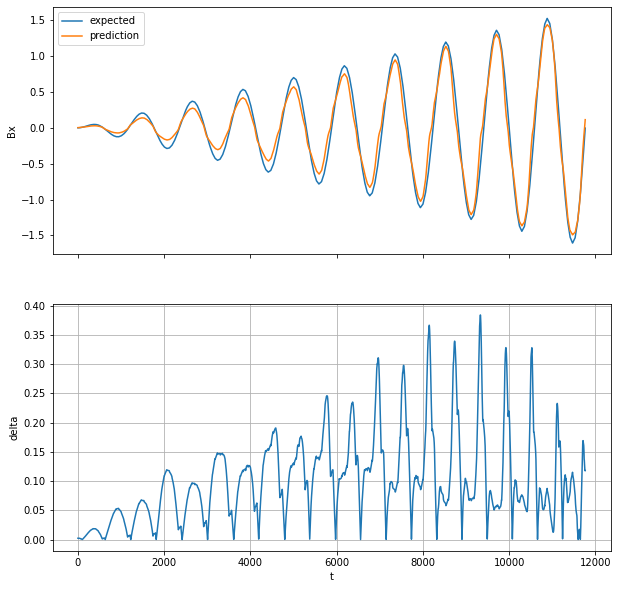

MSE: 0.015711047893849132


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M6')
pred = model.predict(M6_test_X)
del model

plot_predictions(pred, M6_test_Y, figsize=(10, 10))

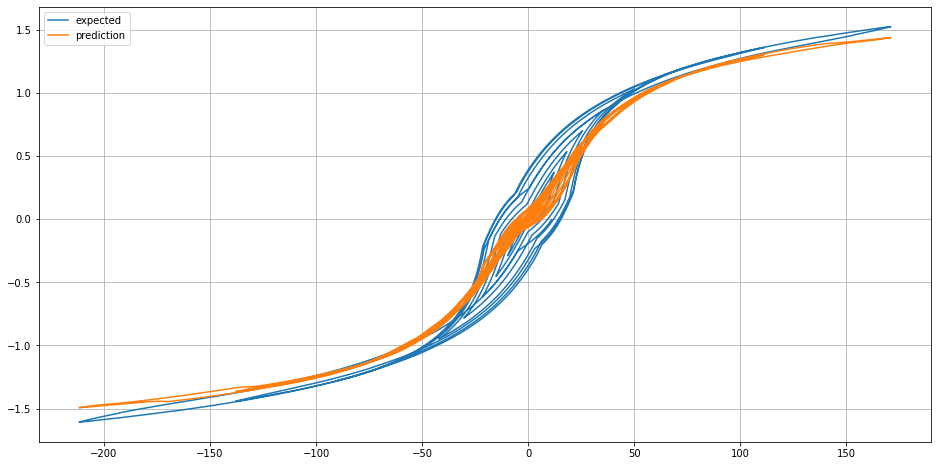

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_test_X[:, -1, 0], M6_test_Y, label='expected')
plt.plot(M6_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 797.3817253112793s


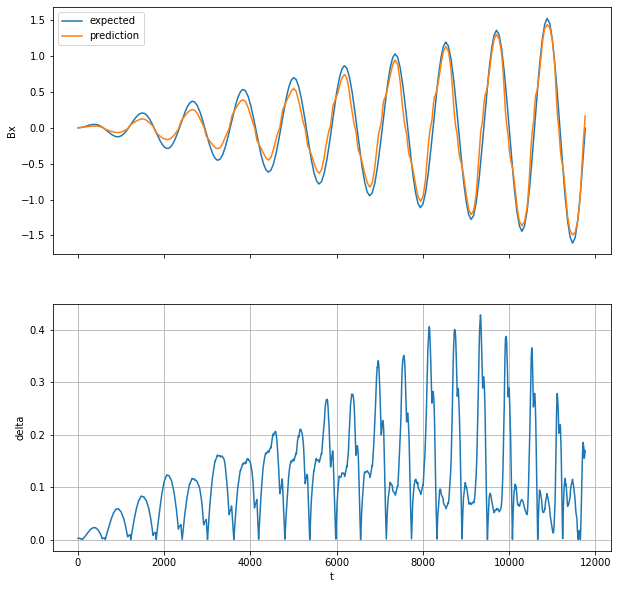

MSE: 0.02121418792923212


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M6')
pred = inference_loop(model, M6_test_X)
del model

plot_predictions(pred, M6_test_Y, figsize=(10, 10))

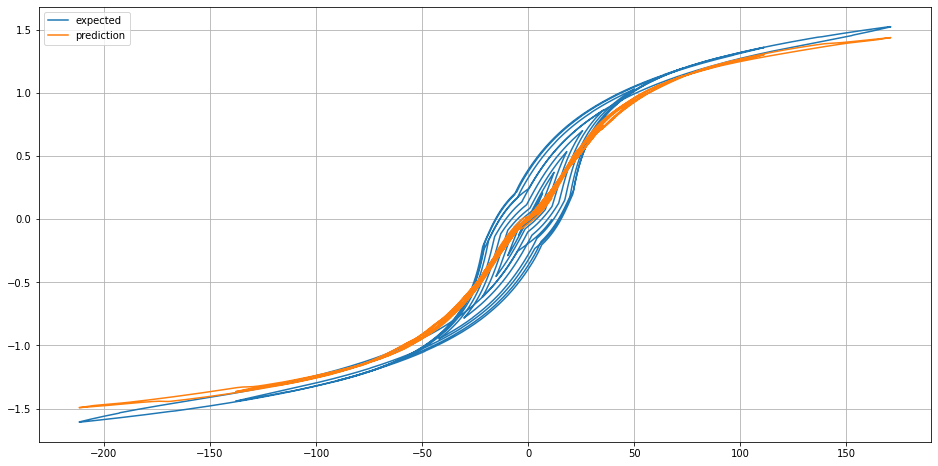

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_test_X[:, -1, 0], M6_test_Y, label='expected')
plt.plot(M6_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M19

Epoch 1/1000
41/41 [==============================] - 30s 648ms/step - loss: 0.4891
Epoch 2/1000
41/41 [==============================] - 26s 634ms/step - loss: 0.0080
Epoch 3/1000
41/41 [==============================] - 26s 623ms/step - loss: 0.0030
Epoch 4/1000
41/41 [==============================] - 26s 627ms/step - loss: 0.0023
Epoch 5/1000
41/41 [==============================] - 26s 625ms/step - loss: 0.0013
Epoch 6/1000
41/41 [==============================] - 26s 628ms/step - loss: 0.0013
Epoch 7/1000
41/41 [==============================] - 26s 629ms/step - loss: 6.9079e-04
Epoch 8/1000
41/41 [==============================] - 25s 621ms/step - loss: 5.6861e-04
Epoch 9/1000
41/41 [==============================] - 26s 627ms/step - loss: 0.0035
Epoch 10/1000
41/41 [==============================] - 26s 630ms/step - loss: 0.0011
Epoch 11/1000
41/41 [==============================] - 26s 638ms/step - loss: 6.7136e-04
Epoch 12/1000
41/41 [==============================] - 26s 636

INFO:tensorflow:Assets written to: ./Model_LSTM_M19/assets


INFO:tensorflow:Assets written to: ./Model_LSTM_M19/assets


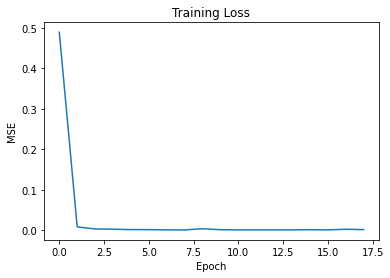

In [ ]:
model = new_model_lstm()
history = compile_and_fit(model, M19_train_X, M19_train_Y)
model.save('./Model_LSTM_M19')
plot_train_stats(history)
del model, history

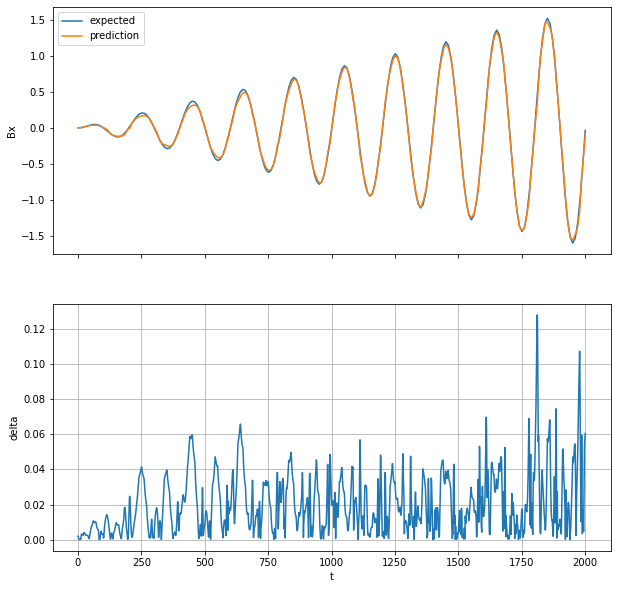

MSE: 0.0006946075759196


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M19')
pred = model.predict(M19_train_X)
del model

plot_predictions(pred, M19_train_Y, figsize=(10, 10))

Start inference loop on 2001 samples... DONE after 134.76155042648315s


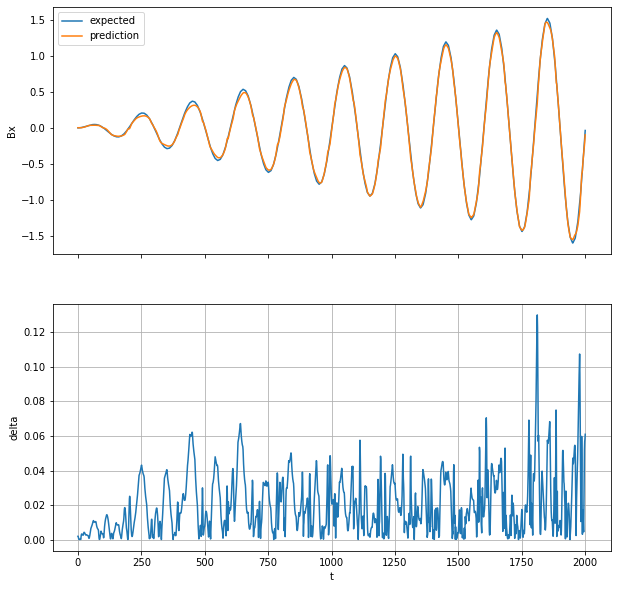

MSE: 0.0007121100983752765


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M19')
pred = inference_loop(model, M19_train_X)
del model

plot_predictions(pred, M19_train_Y, figsize=(10, 10))

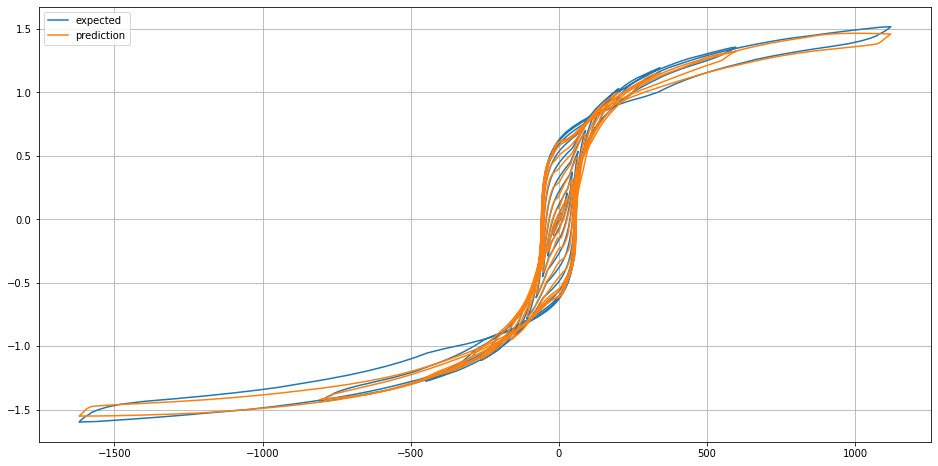

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_train_X[:, -1, 0], M19_train_Y, label='expected')
plt.plot(M19_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

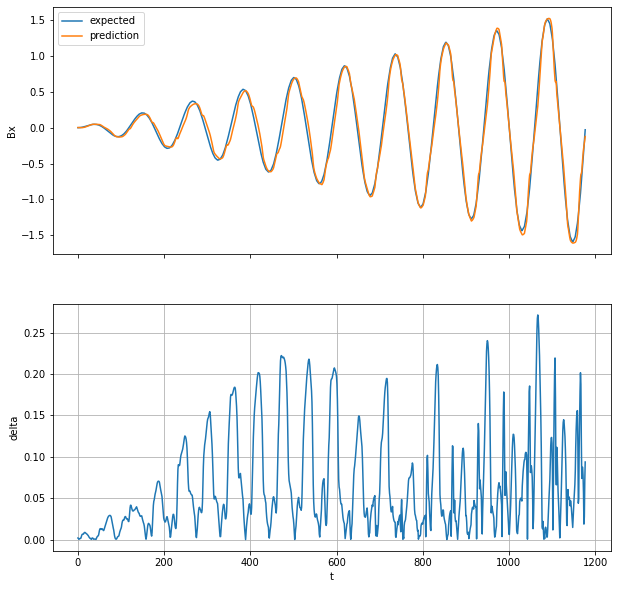

MSE: 0.008111656104662772


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M19')
pred = model.predict(M19_test_X)
del model

plot_predictions(pred, M19_test_Y, figsize=(10, 10))

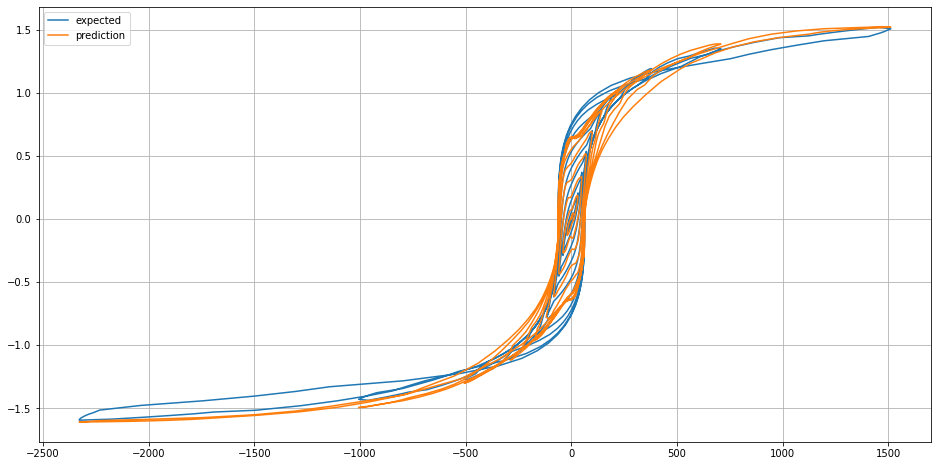

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_test_X[:, -1, 0], M19_test_Y, label='expected')
plt.plot(M19_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 80.31950068473816s


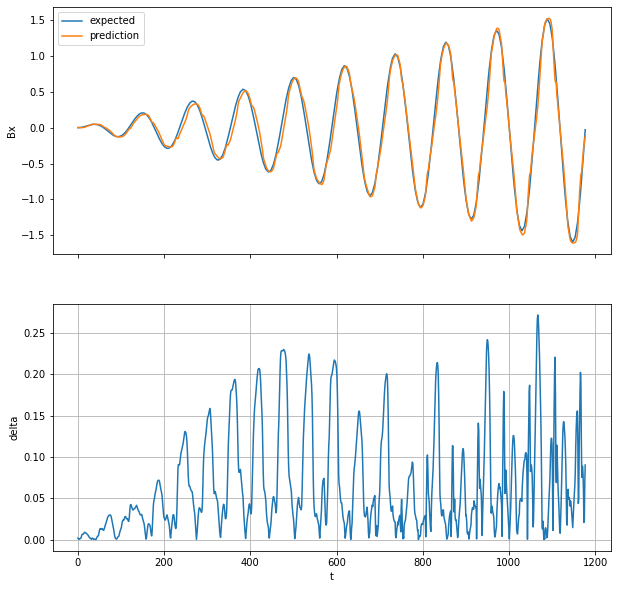

MSE: 0.008492438525079147


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M19')
pred = inference_loop(model, M19_test_X)
del model

plot_predictions(pred, M19_test_Y, figsize=(10, 10))

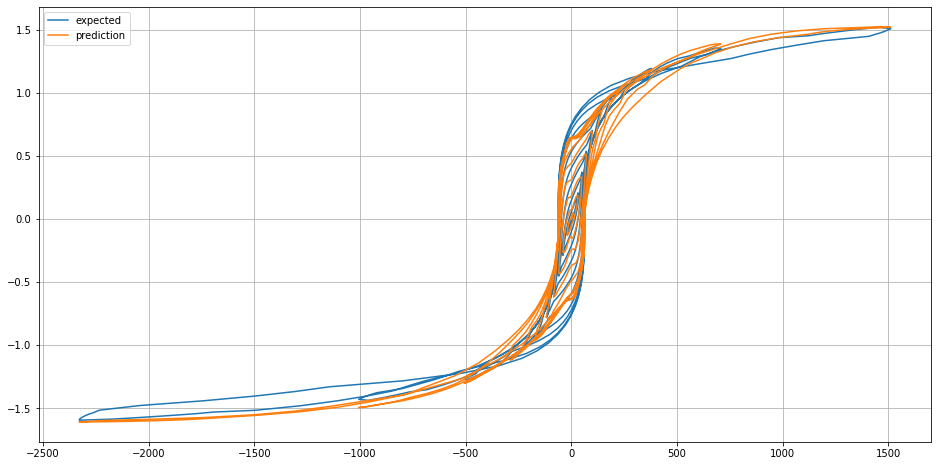

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_test_X[:, -1, 0], M19_test_Y, label='expected')
plt.plot(M19_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M27

Epoch 1/1000
41/41 [==============================] - 30s 627ms/step - loss: 0.5235
Epoch 2/1000
41/41 [==============================] - 26s 629ms/step - loss: 0.0051
Epoch 3/1000
41/41 [==============================] - 26s 635ms/step - loss: 0.0020
Epoch 4/1000
41/41 [==============================] - 26s 636ms/step - loss: 0.0018
Epoch 5/1000
41/41 [==============================] - 26s 641ms/step - loss: 0.0014
Epoch 6/1000
41/41 [==============================] - 27s 654ms/step - loss: 0.0012
Epoch 7/1000
41/41 [==============================] - 26s 636ms/step - loss: 0.0011
Epoch 8/1000
41/41 [==============================] - 26s 621ms/step - loss: 7.6429e-04
Epoch 9/1000
41/41 [==============================] - 26s 624ms/step - loss: 7.7445e-04
Epoch 10/1000
41/41 [==============================] - 26s 626ms/step - loss: 7.3978e-04
Epoch 11/1000
41/41 [==============================] - 26s 630ms/step - loss: 0.0014
Epoch 12/1000
41/41 [==============================] - 26s 631

INFO:tensorflow:Assets written to: ./Model_LSTM_M27/assets


INFO:tensorflow:Assets written to: ./Model_LSTM_M27/assets


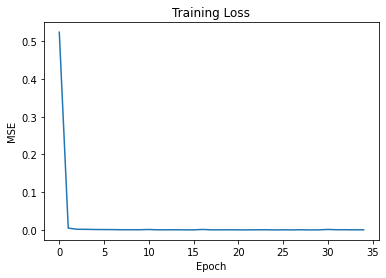

In [ ]:
model = new_model_lstm()
history = compile_and_fit(model, M27_train_X, M27_train_Y)
model.save('./Model_LSTM_M27')
plot_train_stats(history)
del model, history

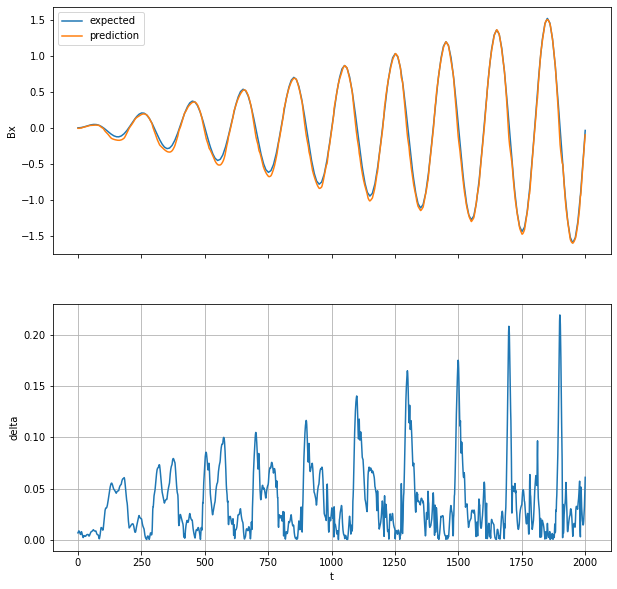

MSE: 0.002573006810537216


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M27')
pred = model.predict(M27_train_X)
del model

plot_predictions(pred, M27_train_Y, figsize=(10, 10))

Start inference loop on 2001 samples... DONE after 135.7712378501892s


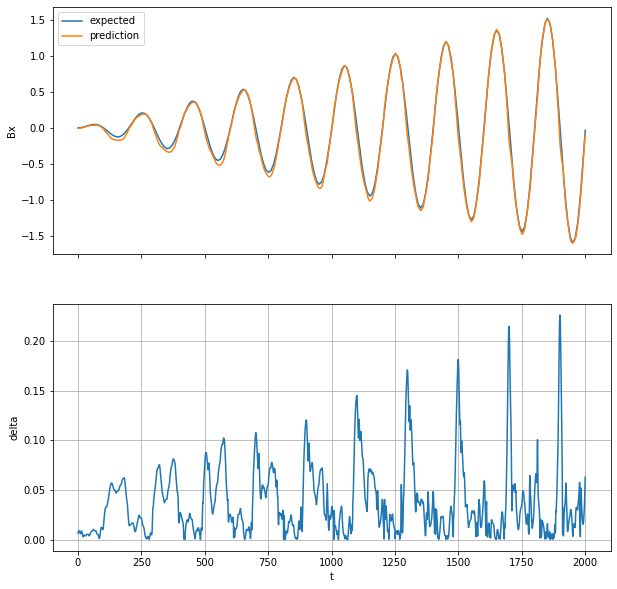

MSE: 0.0027286298085218703


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M27')
pred = inference_loop(model, M27_train_X)
del model

plot_predictions(pred, M27_train_Y, figsize=(10, 10))

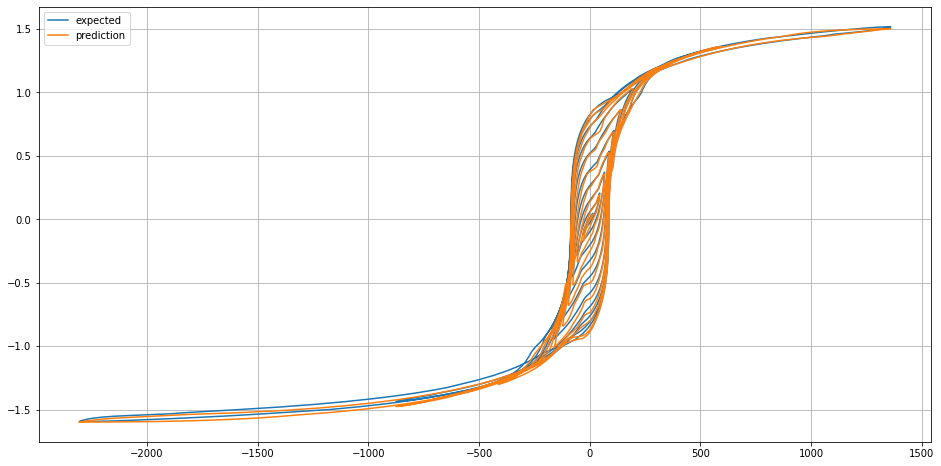

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_train_X[:, -1, 0], M27_train_Y, label='expected')
plt.plot(M27_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

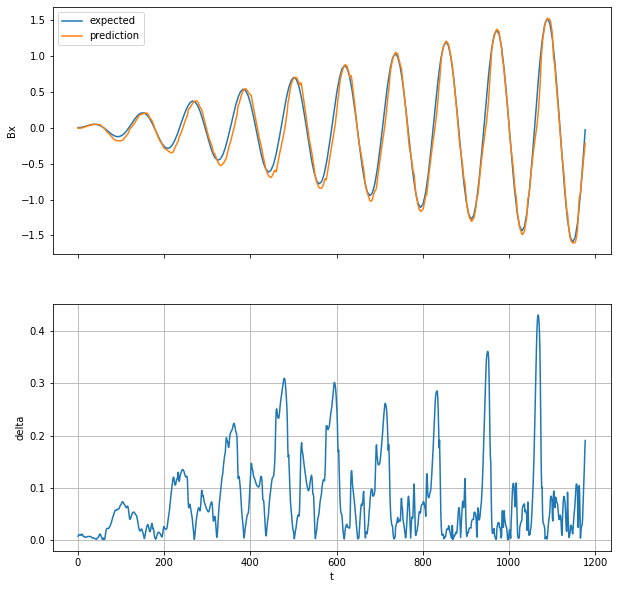

MSE: 0.01294402125414245


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M27')
pred = model.predict(M27_test_X)
del model

plot_predictions(pred, M27_test_Y, figsize=(10, 10))

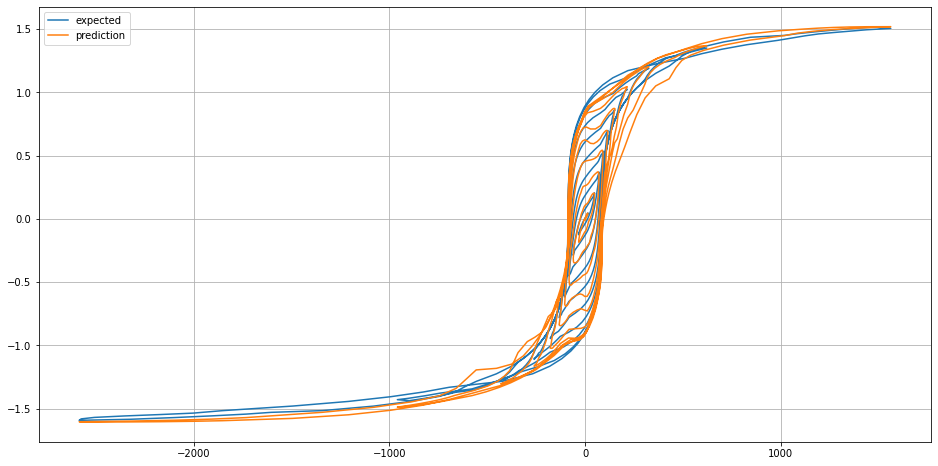

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_test_X[:, -1, 0], M27_test_Y, label='expected')
plt.plot(M27_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 79.723872423172s


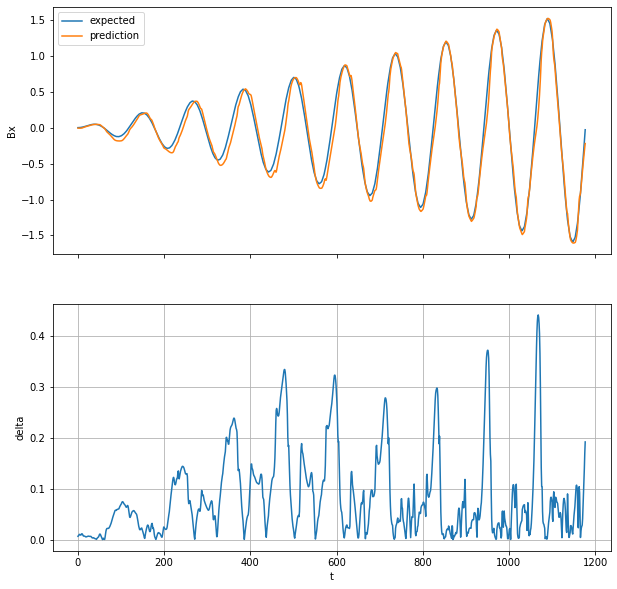

MSE: 0.014134000586777868


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M27')
pred = inference_loop(model, M27_test_X)
del model

plot_predictions(pred, M27_test_Y, figsize=(10, 10))

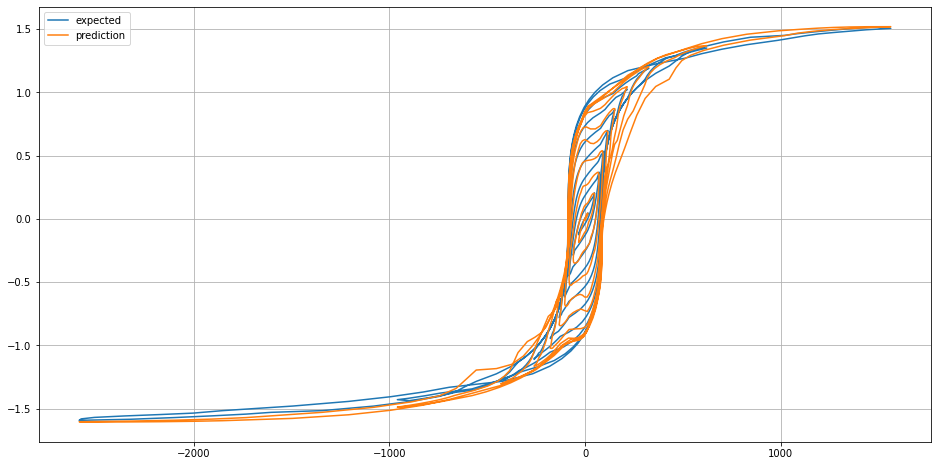

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_test_X[:, -1, 0], M27_test_Y, label='expected')
plt.plot(M27_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### 20PNF1500

Epoch 1/1000
41/41 [==============================] - 29s 621ms/step - loss: 0.4703
Epoch 2/1000
41/41 [==============================] - 25s 617ms/step - loss: 0.0079
Epoch 3/1000
41/41 [==============================] - 25s 618ms/step - loss: 0.0029
Epoch 4/1000
41/41 [==============================] - 25s 617ms/step - loss: 0.0017
Epoch 5/1000
41/41 [==============================] - 25s 614ms/step - loss: 0.0012
Epoch 6/1000
41/41 [==============================] - 25s 614ms/step - loss: 0.0010
Epoch 7/1000
41/41 [==============================] - 25s 611ms/step - loss: 6.3975e-04
Epoch 8/1000
41/41 [==============================] - 25s 618ms/step - loss: 5.6099e-04
Epoch 9/1000
41/41 [==============================] - 25s 604ms/step - loss: 6.1762e-04
Epoch 10/1000
41/41 [==============================] - 25s 613ms/step - loss: 5.2237e-04
Epoch 11/1000
41/41 [==============================] - 25s 616ms/step - loss: 6.0804e-04
Epoch 12/1000
41/41 [==============================] -

INFO:tensorflow:Assets written to: ./Model_LSTM__20PNF1500/assets


INFO:tensorflow:Assets written to: ./Model_LSTM__20PNF1500/assets


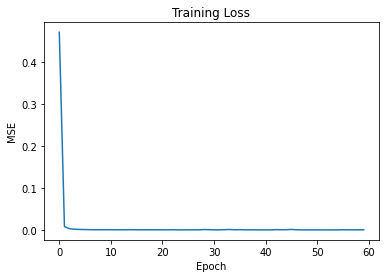

In [ ]:
model = new_model_lstm()
history = compile_and_fit(model, _20PNF1500_train_X, _20PNF1500_train_Y)
model.save('./Model_LSTM__20PNF1500')
plot_train_stats(history)
del model, history

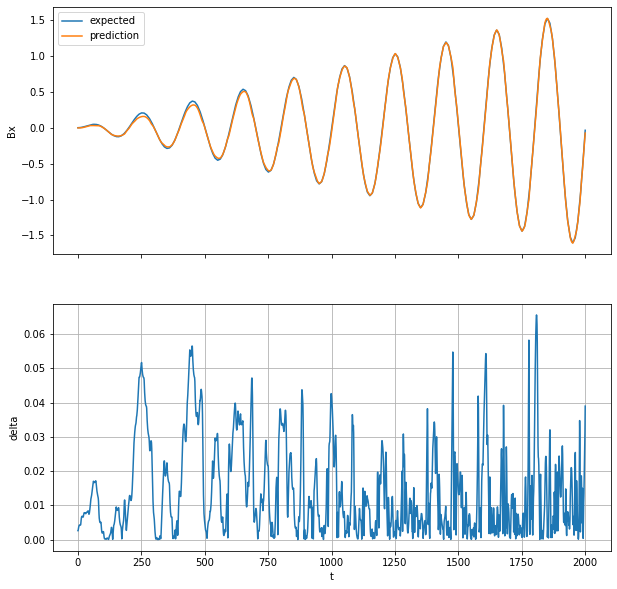

MSE: 0.00038568157283776363


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM__20PNF1500')
pred = model.predict(_20PNF1500_train_X)
del model

plot_predictions(pred, _20PNF1500_train_Y, figsize=(10, 10))

Start inference loop on 2001 samples... DONE after 139.2720968723297s


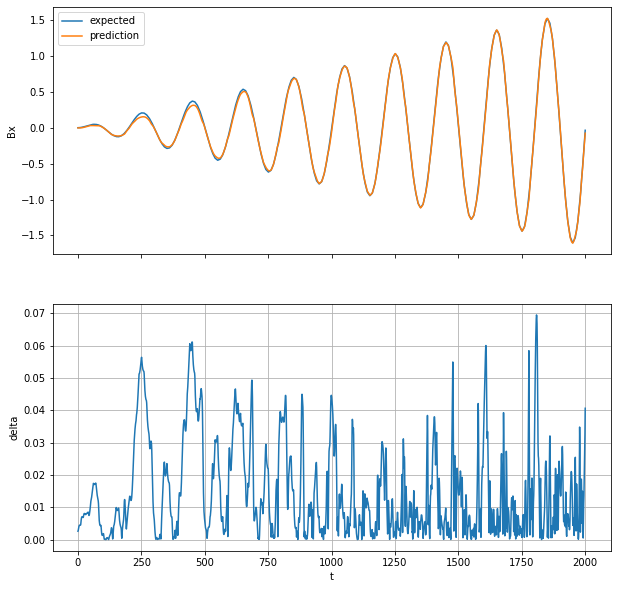

MSE: 0.0004389657199655686


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM__20PNF1500')
pred = inference_loop(model, _20PNF1500_train_X)
del model

plot_predictions(pred, _20PNF1500_train_Y, figsize=(10, 10))

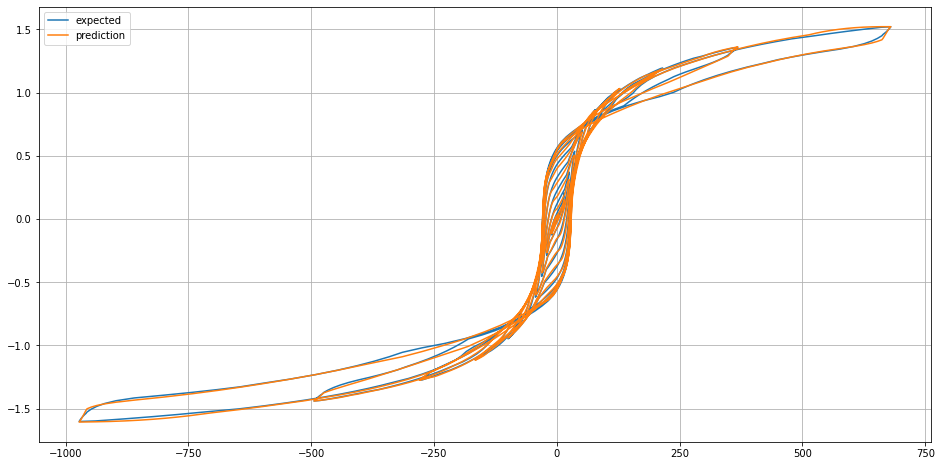

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_train_X[:, -1, 0], _20PNF1500_train_Y, label='expected')
plt.plot(_20PNF1500_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

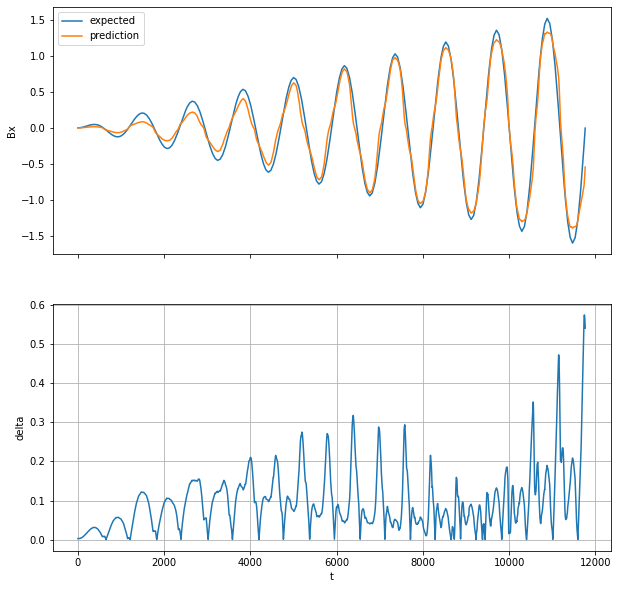

MSE: 0.014969231270612721


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM__20PNF1500')
pred = model.predict(_20PNF1500_test_X)
del model

plot_predictions(pred, _20PNF1500_test_Y, figsize=(10, 10))

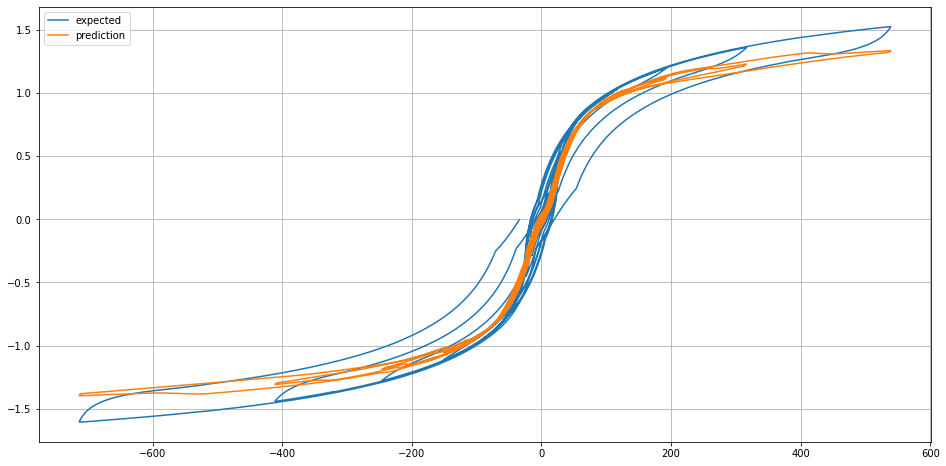

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_test_X[:, -1, 0], _20PNF1500_test_Y, label='expected')
plt.plot(_20PNF1500_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 820.9773604869843s


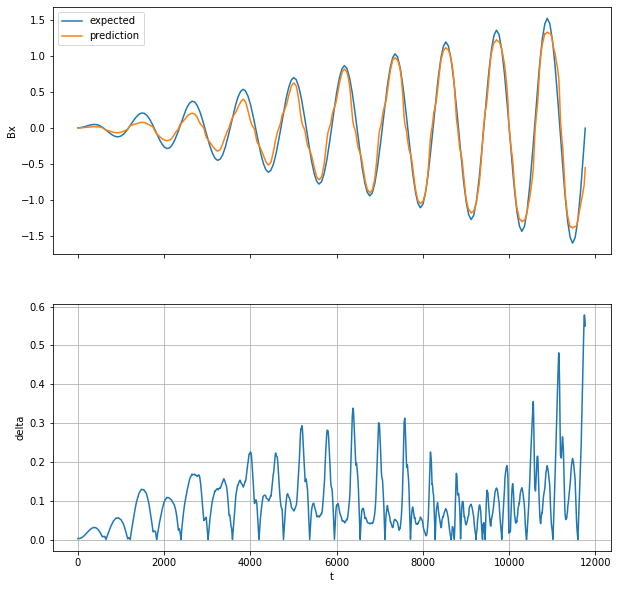

MSE: 0.016157850220849236


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM__20PNF1500')
pred = inference_loop(model, _20PNF1500_test_X)
del model

plot_predictions(pred, _20PNF1500_test_Y, figsize=(10, 10))

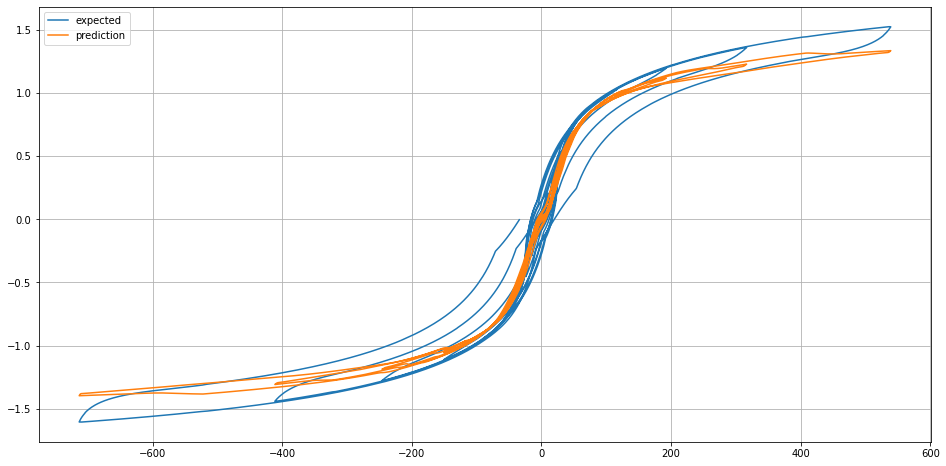

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_test_X[:, -1, 0], _20PNF1500_test_Y, label='expected')
plt.plot(_20PNF1500_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

## GRU1

### M6 (2000 data point version)

Epoch 1/1000
41/41 [==============================] - 5s 30ms/step - loss: 3.4404
Epoch 2/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.2543
Epoch 3/1000
41/41 [==============================] - 1s 31ms/step - loss: 0.0673
Epoch 4/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0334
Epoch 5/1000
41/41 [==============================] - 1s 31ms/step - loss: 0.0227
Epoch 6/1000
41/41 [==============================] - 1s 31ms/step - loss: 0.0169
Epoch 7/1000
41/41 [==============================] - 1s 31ms/step - loss: 0.0134
Epoch 8/1000
41/41 [==============================] - 1s 31ms/step - loss: 0.0109
Epoch 9/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0090
Epoch 10/1000
41/41 [==============================] - 1s 32ms/step - loss: 0.0075
Epoch 11/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0065
Epoch 12/1000
41/41 [==============================] - 1s 31ms/step - loss: 0.0055
Epoch 13/1000

INFO:tensorflow:Assets written to: ./Model_GRU1_M6/assets


INFO:tensorflow:Assets written to: ./Model_GRU1_M6/assets


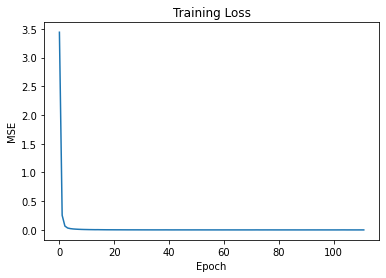

In [ ]:
model = new_model_gru1()
history = compile_and_fit(model, M6_train_X, M6_train_Y)
model.save('./Model_GRU1_M6')
plot_train_stats(history)
del model, history

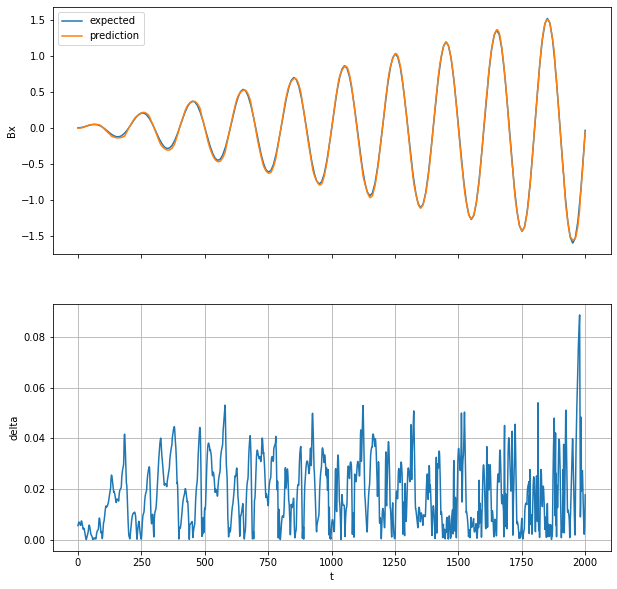

MSE: 0.0005012218246018434


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M6')
pred = model.predict(M6_train_X)
del model

plot_predictions(pred, M6_train_Y, figsize=(10, 10))

Start inference loop on 2001 samples... DONE after 110.27271175384521s


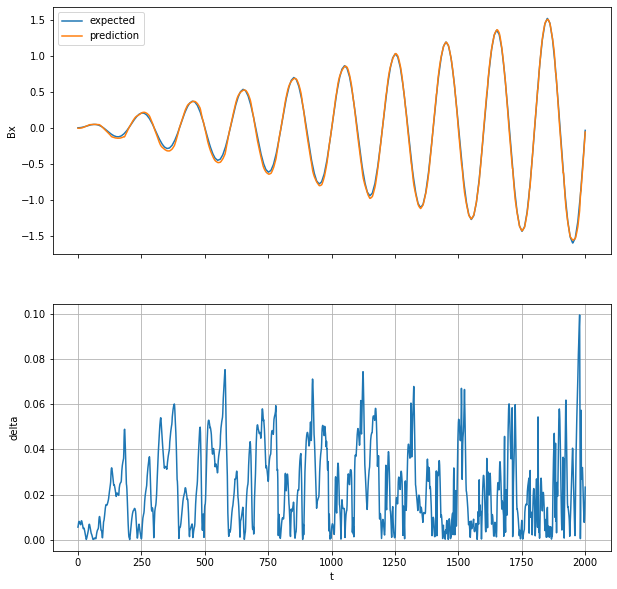

MSE: 0.000853678511791674


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M6')
pred = inference_loop(model, M6_train_X)
del model

plot_predictions(pred, M6_train_Y, figsize=(10, 10))

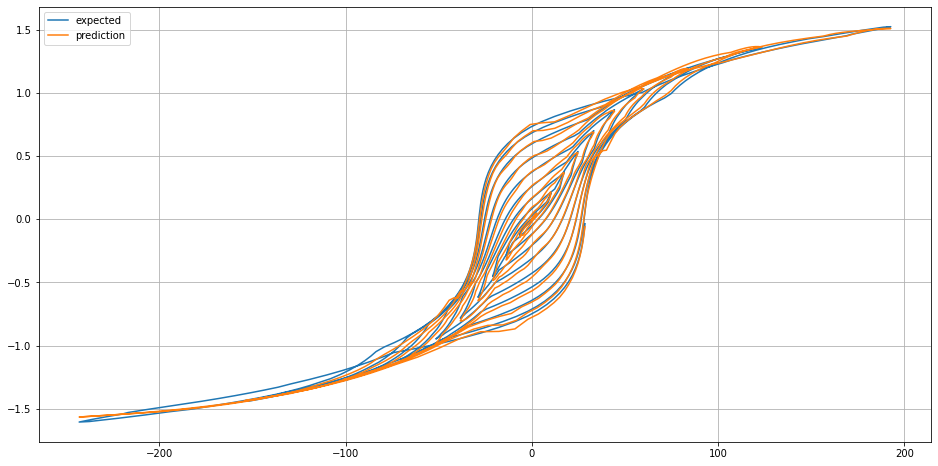

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_train_X[:, -1, 0], M6_train_Y, label='expected')
plt.plot(M6_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

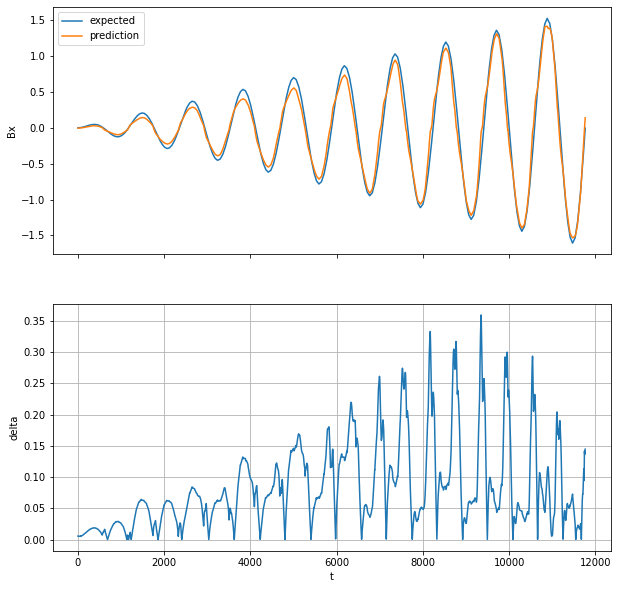

MSE: 0.011766834298843542


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M6')
pred = model.predict(M6_test_X)
del model

plot_predictions(pred, M6_test_Y, figsize=(10, 10))

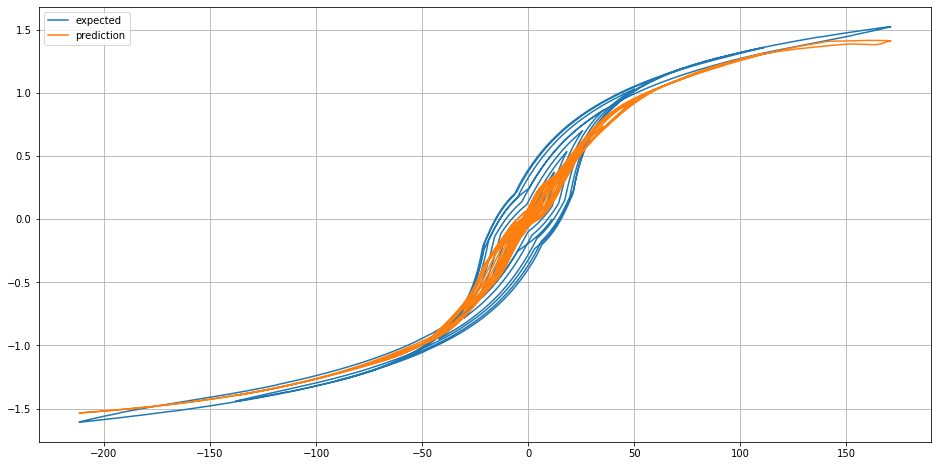

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_test_X[:, -1, 0], M6_test_Y, label='expected')
plt.plot(M6_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 646.8680448532104s


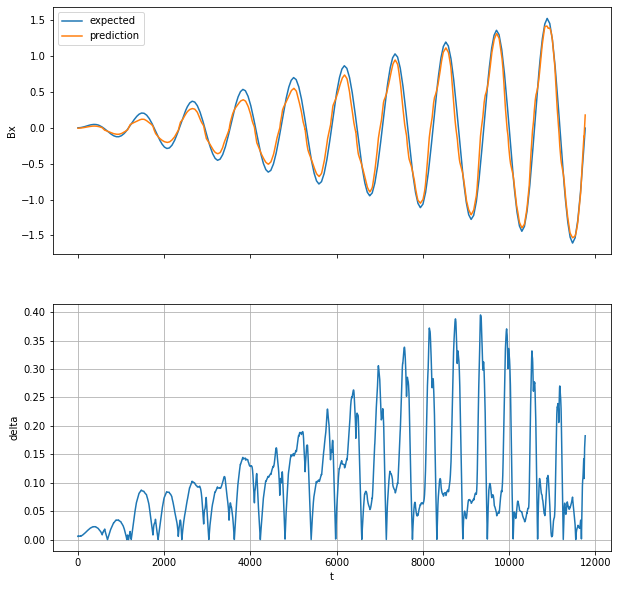

MSE: 0.017933610182947098


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M6')
pred = inference_loop(model, M6_test_X)
del model

plot_predictions(pred, M6_test_Y, figsize=(10, 10))

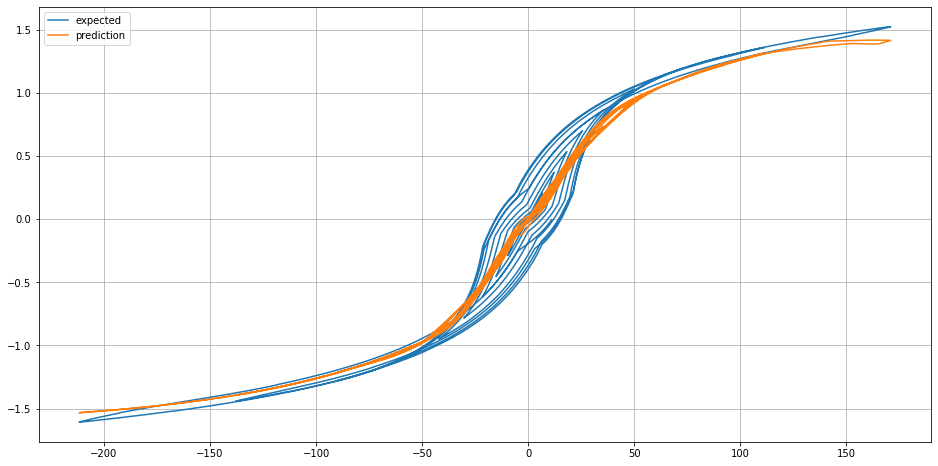

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_test_X[:, -1, 0], M6_test_Y, label='expected')
plt.plot(M6_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M19

Epoch 1/1000
41/41 [==============================] - 5s 30ms/step - loss: 1.5517
Epoch 2/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.1991
Epoch 3/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0544
Epoch 4/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0247
Epoch 5/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0202
Epoch 6/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0173
Epoch 7/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0152
Epoch 8/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0136
Epoch 9/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0122
Epoch 10/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0110
Epoch 11/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0098
Epoch 12/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0077
Epoch 13/1000

INFO:tensorflow:Assets written to: ./Model_GRU1_M19/assets


INFO:tensorflow:Assets written to: ./Model_GRU1_M19/assets


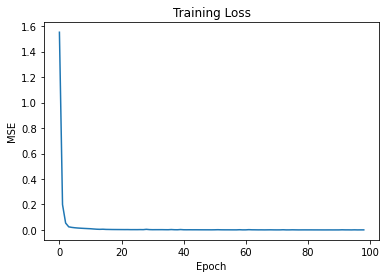

In [ ]:
model = new_model_gru1()
history = compile_and_fit(model, M19_train_X, M19_train_Y)
model.save('./Model_GRU1_M19')
plot_train_stats(history)
del model, history

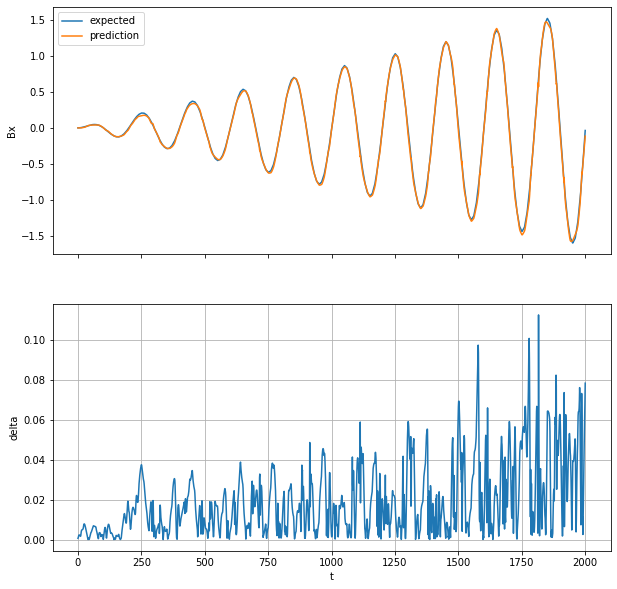

MSE: 0.0006658989393603243


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M19')
pred = model.predict(M19_train_X)
del model

plot_predictions(pred, M19_train_Y, figsize=(10, 10))

Start inference loop on 2001 samples... DONE after 109.0418918132782s


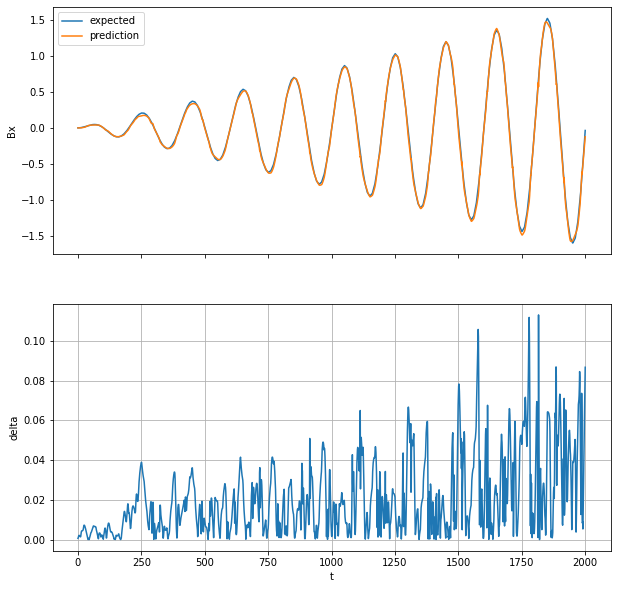

MSE: 0.0007718820882763178


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M19')
pred = inference_loop(model, M19_train_X)
del model

plot_predictions(pred, M19_train_Y, figsize=(10, 10))

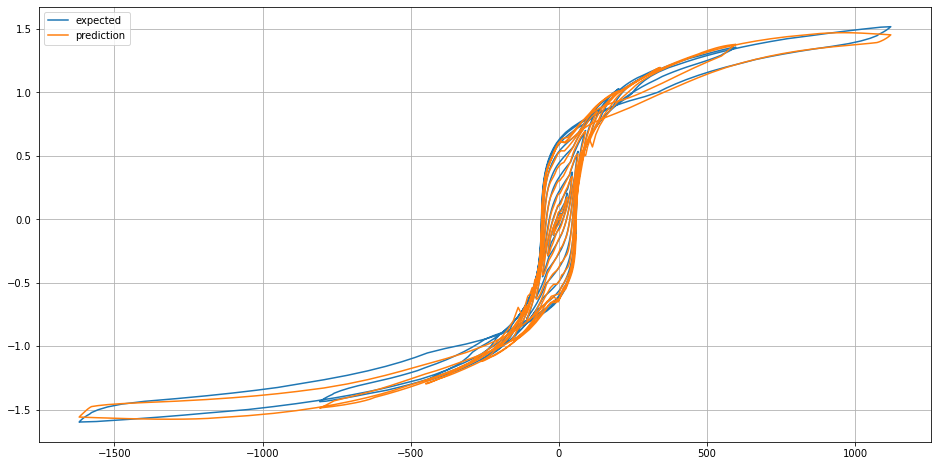

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_train_X[:, -1, 0], M19_train_Y, label='expected')
plt.plot(M19_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

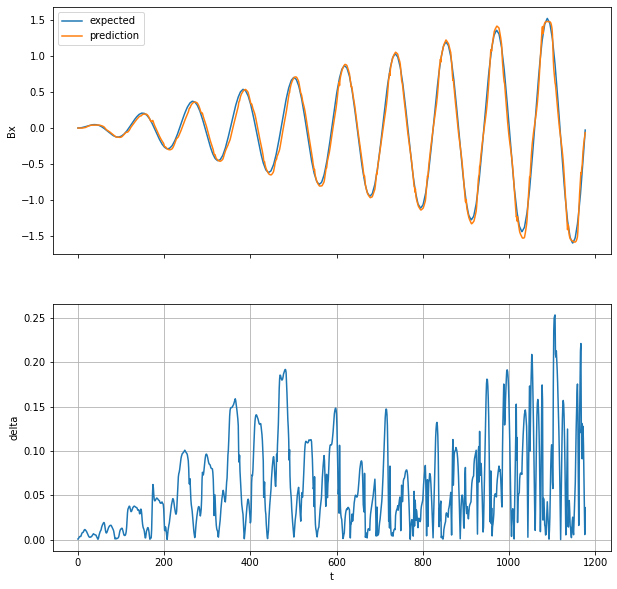

MSE: 0.0061752661423632015


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M19')
pred = model.predict(M19_test_X)
del model

plot_predictions(pred, M19_test_Y, figsize=(10, 10))

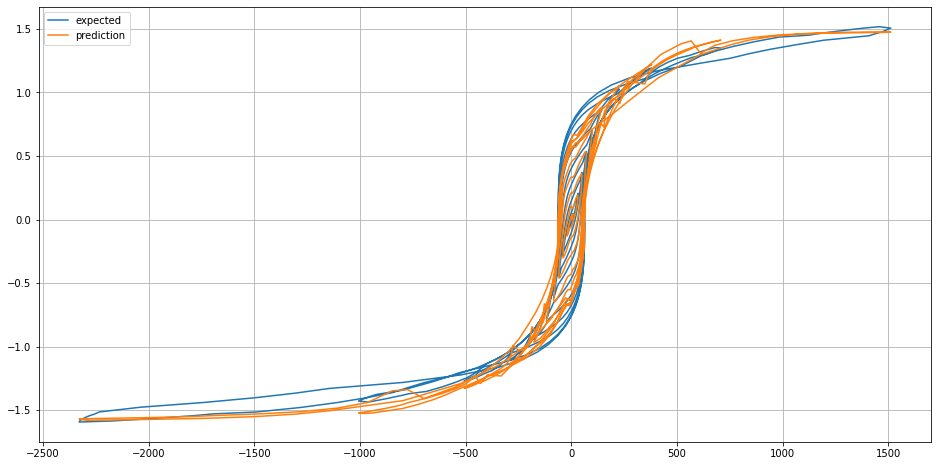

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_test_X[:, -1, 0], M19_test_Y, label='expected')
plt.plot(M19_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 64.76280188560486s


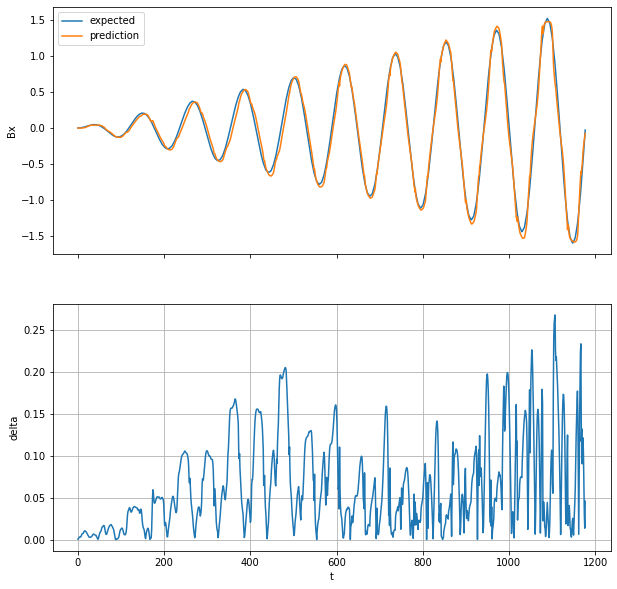

MSE: 0.007048892522856956


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M19')
pred = inference_loop(model, M19_test_X)
del model

plot_predictions(pred, M19_test_Y, figsize=(10, 10))

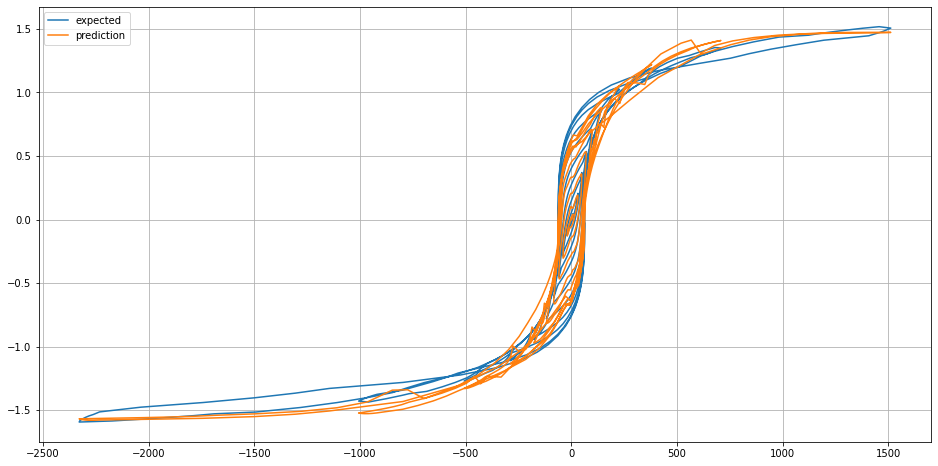

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_test_X[:, -1, 0], M19_test_Y, label='expected')
plt.plot(M19_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M27

Epoch 1/1000
41/41 [==============================] - 5s 29ms/step - loss: 0.9366
Epoch 2/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0827
Epoch 3/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0467
Epoch 4/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0352
Epoch 5/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0232
Epoch 6/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0169
Epoch 7/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0128
Epoch 8/1000
41/41 [==============================] - 1s 31ms/step - loss: 0.0109
Epoch 9/1000
41/41 [==============================] - 1s 32ms/step - loss: 0.0097
Epoch 10/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0085
Epoch 11/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0088
Epoch 12/1000
41/41 [==============================] - 1s 31ms/step - loss: 0.0073
Epoch 13/1000

INFO:tensorflow:Assets written to: ./Model_GRU1_M27/assets


INFO:tensorflow:Assets written to: ./Model_GRU1_M27/assets


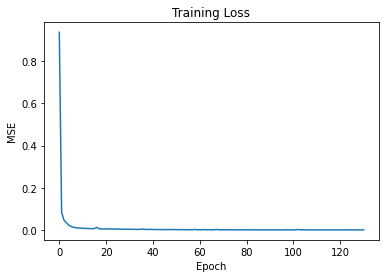

In [ ]:
model = new_model_gru1()
history = compile_and_fit(model, M27_train_X, M27_train_Y)
model.save('./Model_GRU1_M27')
plot_train_stats(history)
del model, history

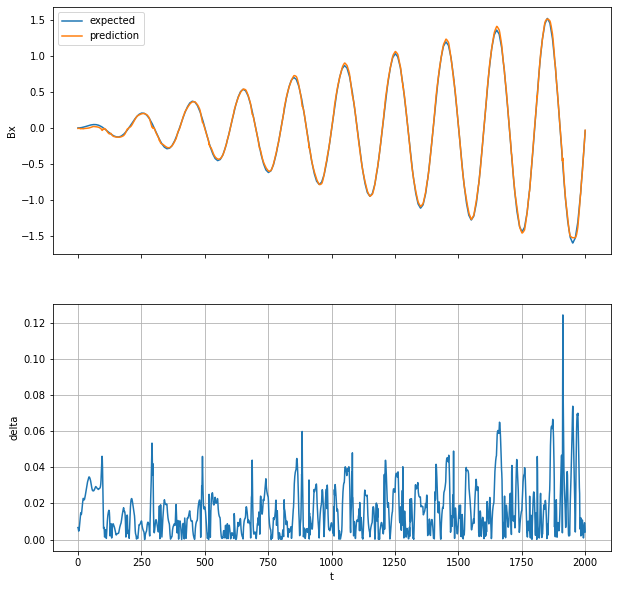

MSE: 0.0004509010280377758


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M27')
pred = model.predict(M27_train_X)
del model

plot_predictions(pred, M27_train_Y, figsize=(10, 10))

Start inference loop on 2001 samples... DONE after 111.38842487335205s


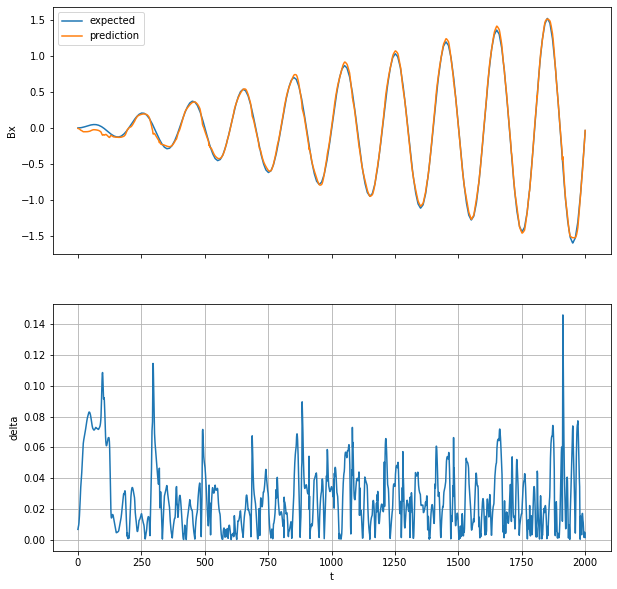

MSE: 0.0011815558079361355


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M27')
pred = inference_loop(model, M27_train_X)
del model

plot_predictions(pred, M27_train_Y, figsize=(10, 10))

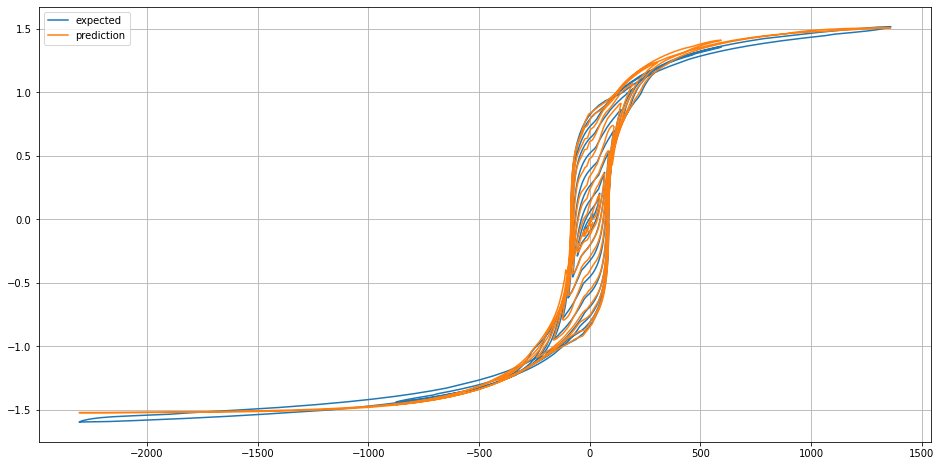

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_train_X[:, -1, 0], M27_train_Y, label='expected')
plt.plot(M27_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

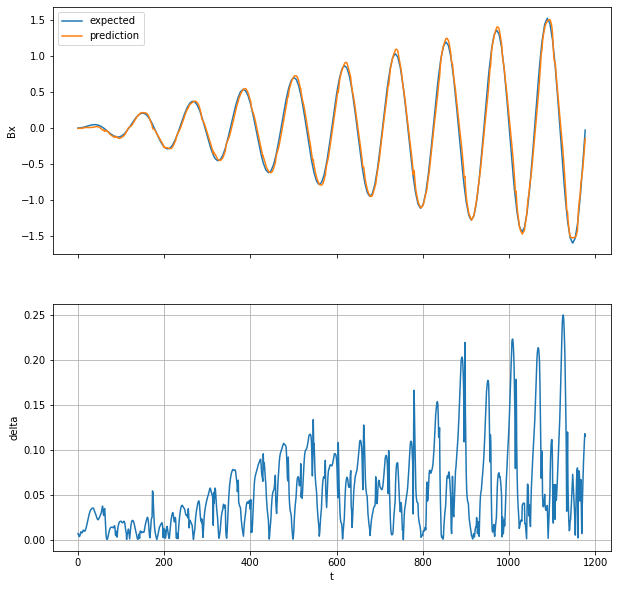

MSE: 0.005028114194269763


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M27')
pred = model.predict(M27_test_X)
del model

plot_predictions(pred, M27_test_Y, figsize=(10, 10))

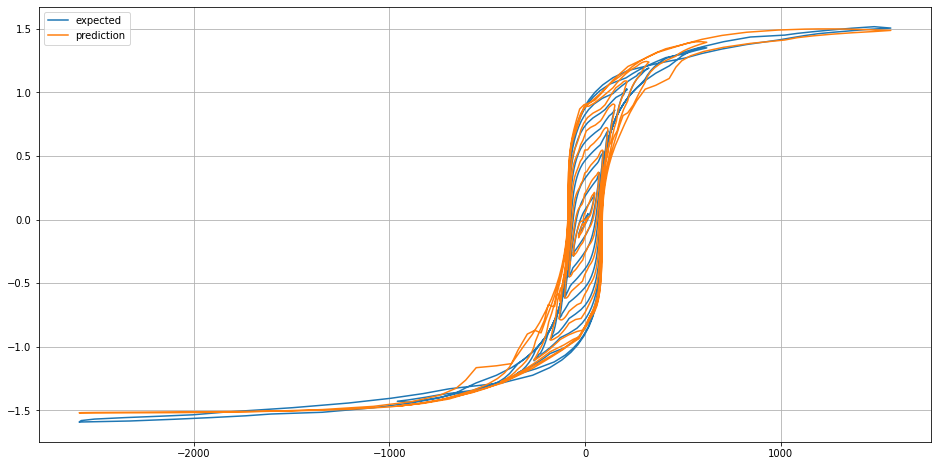

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_test_X[:, -1, 0], M27_test_Y, label='expected')
plt.plot(M27_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 64.59074878692627s


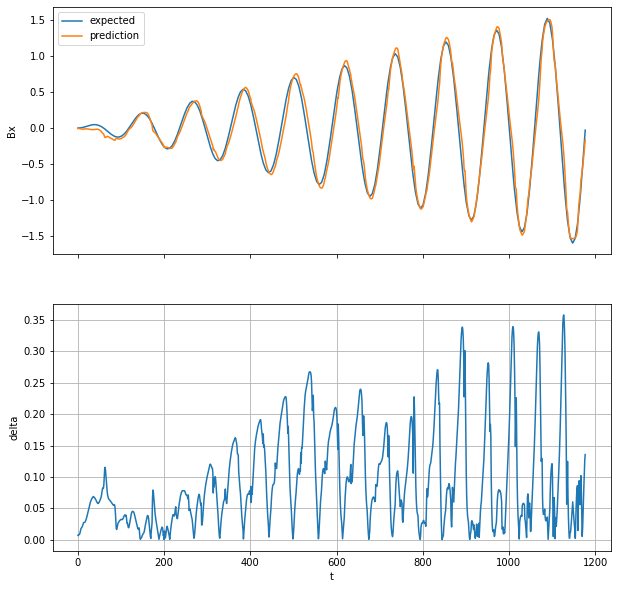

MSE: 0.014755435558755149


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M27')
pred = inference_loop(model, M27_test_X)
del model

plot_predictions(pred, M27_test_Y, figsize=(10, 10))

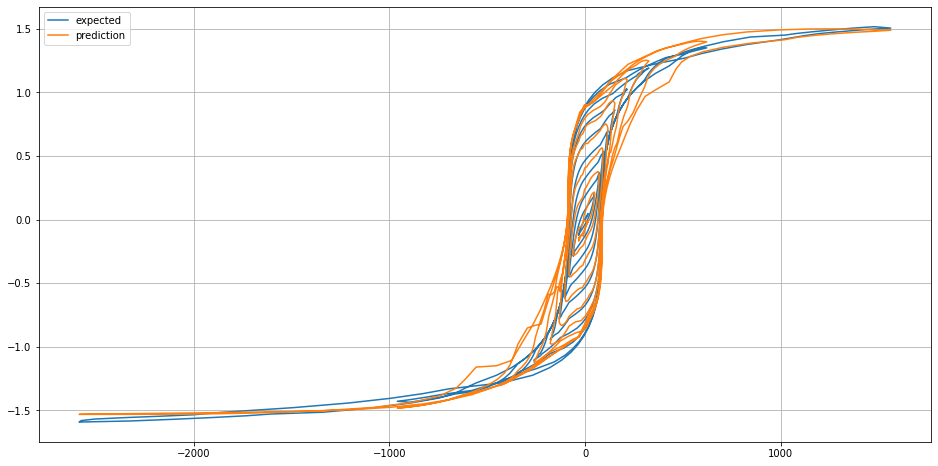

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_test_X[:, -1, 0], M27_test_Y, label='expected')
plt.plot(M27_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### 20PNF1500

Epoch 1/1000
41/41 [==============================] - 5s 30ms/step - loss: 1.6054
Epoch 2/1000
41/41 [==============================] - 1s 31ms/step - loss: 0.1646
Epoch 3/1000
41/41 [==============================] - 1s 31ms/step - loss: 0.0507
Epoch 4/1000
41/41 [==============================] - 1s 32ms/step - loss: 0.0239
Epoch 5/1000
41/41 [==============================] - 1s 31ms/step - loss: 0.0196
Epoch 6/1000
41/41 [==============================] - 1s 31ms/step - loss: 0.0164
Epoch 7/1000
41/41 [==============================] - 1s 31ms/step - loss: 0.0136
Epoch 8/1000
41/41 [==============================] - 1s 31ms/step - loss: 0.0116
Epoch 9/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0099
Epoch 10/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0086
Epoch 11/1000
41/41 [==============================] - 1s 31ms/step - loss: 0.0082
Epoch 12/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0066
Epoch 13/1000

INFO:tensorflow:Assets written to: ./Model_GRU1__20PNF1500/assets


INFO:tensorflow:Assets written to: ./Model_GRU1__20PNF1500/assets


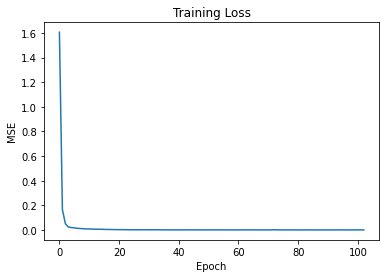

In [ ]:
model = new_model_gru1()
history = compile_and_fit(model, _20PNF1500_train_X, _20PNF1500_train_Y)
model.save('./Model_GRU1__20PNF1500')
plot_train_stats(history)
del model, history

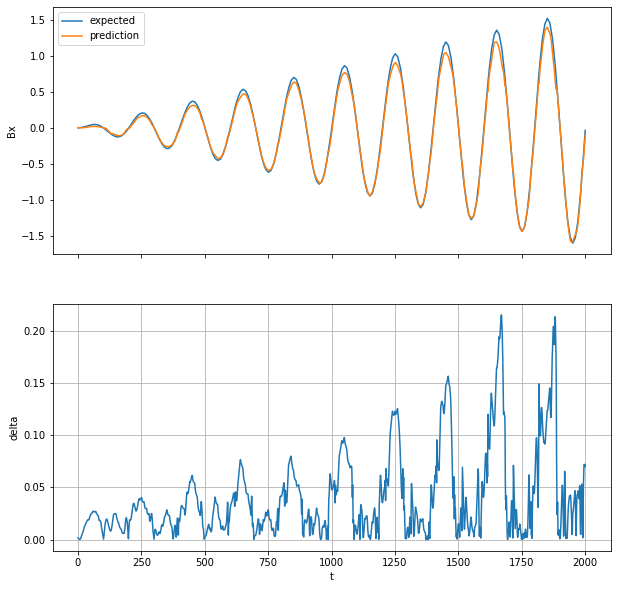

MSE: 0.0033027927158532622


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1__20PNF1500')
pred = model.predict(_20PNF1500_train_X)
del model

plot_predictions(pred, _20PNF1500_train_Y, figsize=(10, 10))

Start inference loop on 2001 samples... DONE after 114.05374360084534s


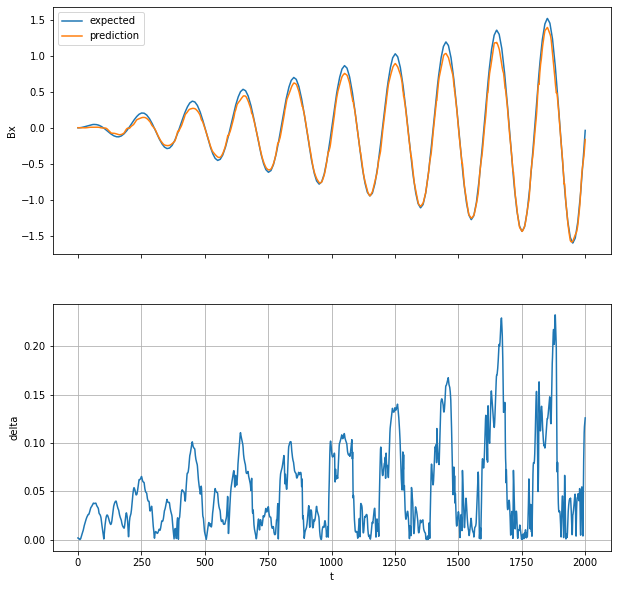

MSE: 0.004769937527050174


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1__20PNF1500')
pred = inference_loop(model, _20PNF1500_train_X)
del model

plot_predictions(pred, _20PNF1500_train_Y, figsize=(10, 10))

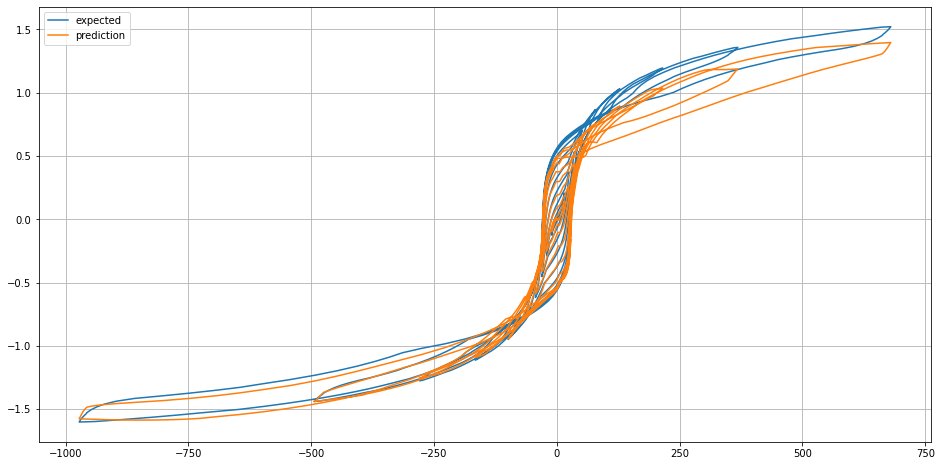

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_train_X[:, -1, 0], _20PNF1500_train_Y, label='expected')
plt.plot(_20PNF1500_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

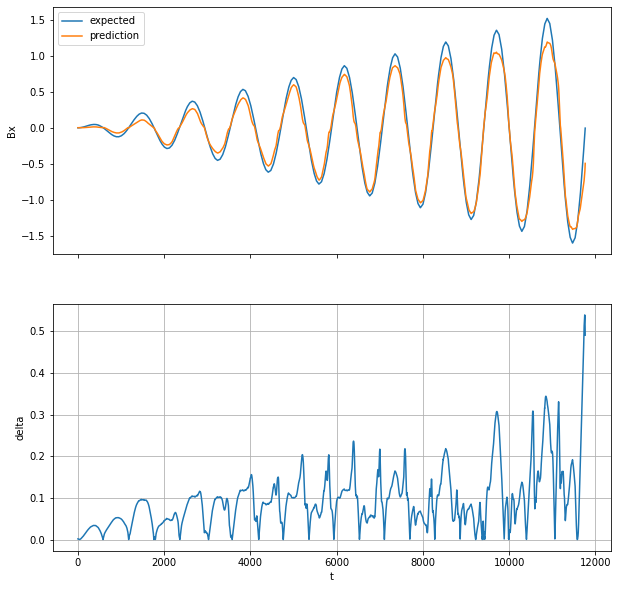

MSE: 0.013620588486406252


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1__20PNF1500')
pred = model.predict(_20PNF1500_test_X)
del model

plot_predictions(pred, _20PNF1500_test_Y, figsize=(10, 10))

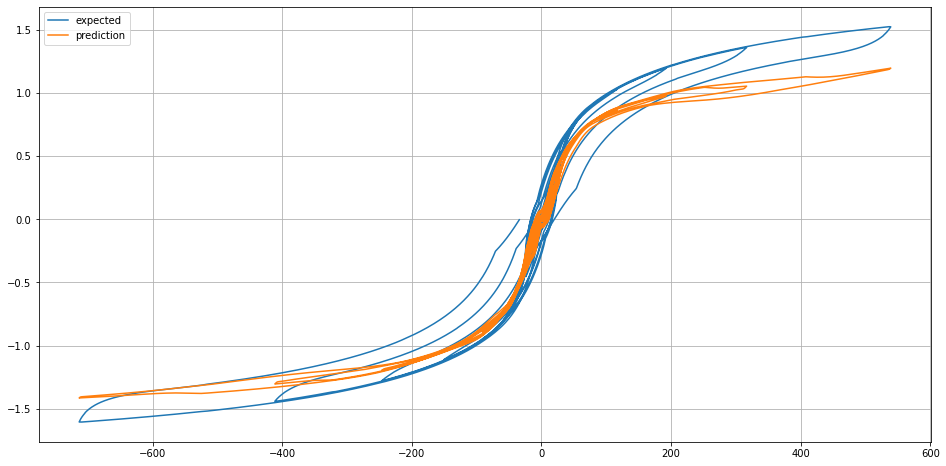

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_test_X[:, -1, 0], _20PNF1500_test_Y, label='expected')
plt.plot(_20PNF1500_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 661.2020254135132s


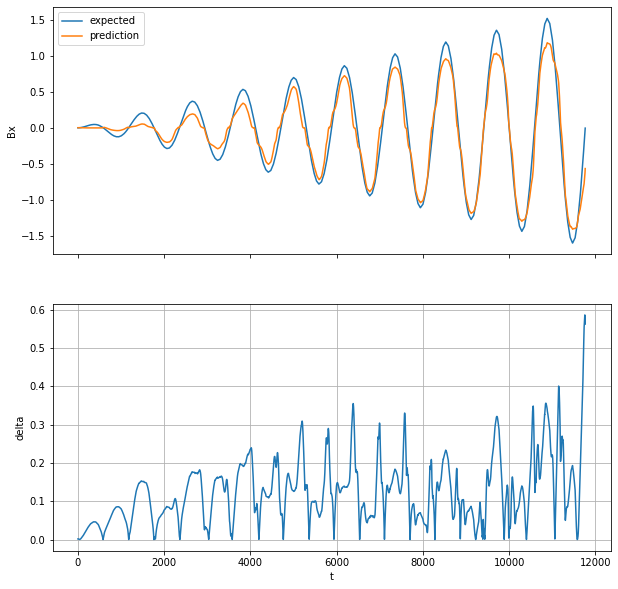

MSE: 0.02234049295563326


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1__20PNF1500')
pred = inference_loop(model, _20PNF1500_test_X)
del model

plot_predictions(pred, _20PNF1500_test_Y, figsize=(10, 10))

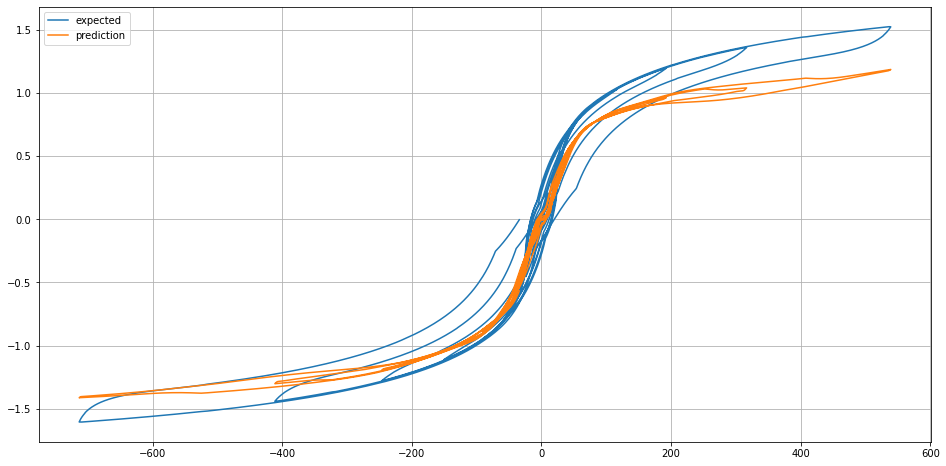

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_test_X[:, -1, 0], _20PNF1500_test_Y, label='expected')
plt.plot(_20PNF1500_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

# The End